In [1]:
#install.packages("ggplot2")
#install.packages("forecast")

In [3]:
library(ggplot2)
library(forecast)

In [4]:
gasoline = read.csv('IE360_Spring22_HW2_data.csv')
head(gasoline)
str(gasoline)

gasoline$Unleaded.Gasoline.Sale..UGS. = as.numeric(gsub(" ","",gasoline$Unleaded.Gasoline.Sale..UGS.))
gasoline$X..LPG.Vehicles..NLPG. = as.numeric(gsub(" ","",gasoline$X..LPG.Vehicles..NLPG.))
gasoline$X..Unleaded.Gasoline.Vehicles..NUGV. = as.numeric(gsub(" ","",gasoline$X..Unleaded.Gasoline.Vehicles..NUGV.))
gasoline$GNP.Agriculture = as.numeric(gsub(" ","",gasoline$GNP.Agriculture))
gasoline$GNP.Commerce = as.numeric(gsub(" ","",gasoline$GNP.Commerce))
gasoline$GNP.Total = as.numeric(gsub(" ","",gasoline$GNP.Total))

head(gasoline)
str(gasoline)

Quarter,Unleaded.Gasoline.Sale..UGS.,RNUV,X..LPG.Vehicles..NLPG.,Price.of.Unleaded.Gasoline..PU.,Price.of.Diesel.Gasoline..PG.,X..Unleaded.Gasoline.Vehicles..NUGV.,X..of.Diesel.Gasoline.Vehicles..NDGV.,GNP.Agriculture,GNP.Commerce,GNP.Total
2000_Q1,1 128 971,0.0146,940 000,469.03,355.69,4 647 500,281.9853,1 040 173,3 483 132,18 022 686
2000_Q2,1 199 569,0.0205,941 000,459.42,344.58,4 742 876,284.0813,1 760 460,4 525 451,21 797 130
2000_Q3,1 370 167,0.0207,943 500,439.98,327.21,4 840 931,286.7169,6 974 808,5 915 204,30 050 207
2000_Q4,1 127 548,0.0163,948 000,402.08,300.67,4 919 685,288.3137,3 267 125,4 929 778,24 480 153
2001_Q1,1 033 918,0.0071,950 000,411.58,305.75,4 954 754,287.6237,1 004 528,3 418 387,15 832 648
2001_Q2,1 019 754,0.0051,955 000,520.39,374.78,4 980 204,287.8814,1 449 357,4 359 831,20 296 918


'data.frame':	32 obs. of  11 variables:
 $ Quarter                              : Factor w/ 32 levels "2000_Q1","2000_Q2",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Unleaded.Gasoline.Sale..UGS.         : Factor w/ 29 levels ""," 736 580",..: 25 27 29 24 20 18 28 17 11 19 ...
 $ RNUV                                 : num  0.0146 0.0205 0.0207 0.0163 0.0071 0.0051 0.0041 0.0048 0.0012 0.0032 ...
 $ X..LPG.Vehicles..NLPG.               : Factor w/ 32 levels " 940 000"," 941 000",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Price.of.Unleaded.Gasoline..PU.      : num  469 459 440 402 412 ...
 $ Price.of.Diesel.Gasoline..PG.        : num  356 345 327 301 306 ...
 $ X..Unleaded.Gasoline.Vehicles..NUGV. : Factor w/ 32 levels "4 647 500","4 742 876",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ X..of.Diesel.Gasoline.Vehicles..NDGV.: num  282 284 287 288 288 ...
 $ GNP.Agriculture                      : Factor w/ 32 levels " 832 953"," 841 604",..: 6 16 31 24 3 11 25 17 1 9 ...
 $ GNP.Commerce                         : Factor w/ 32 

Quarter,Unleaded.Gasoline.Sale..UGS.,RNUV,X..LPG.Vehicles..NLPG.,Price.of.Unleaded.Gasoline..PU.,Price.of.Diesel.Gasoline..PG.,X..Unleaded.Gasoline.Vehicles..NUGV.,X..of.Diesel.Gasoline.Vehicles..NDGV.,GNP.Agriculture,GNP.Commerce,GNP.Total
2000_Q1,1128971,0.0146,940000,469.03,355.69,4647500,281.9853,1040173,3483132,18022686
2000_Q2,1199569,0.0205,941000,459.42,344.58,4742876,284.0813,1760460,4525451,21797130
2000_Q3,1370167,0.0207,943500,439.98,327.21,4840931,286.7169,6974808,5915204,30050207
2000_Q4,1127548,0.0163,948000,402.08,300.67,4919685,288.3137,3267125,4929778,24480153
2001_Q1,1033918,0.0071,950000,411.58,305.75,4954754,287.6237,1004528,3418387,15832648
2001_Q2,1019754,0.0051,955000,520.39,374.78,4980204,287.8814,1449357,4359831,20296918


'data.frame':	32 obs. of  11 variables:
 $ Quarter                              : Factor w/ 32 levels "2000_Q1","2000_Q2",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Unleaded.Gasoline.Sale..UGS.         : num  1128971 1199569 1370167 1127548 1033918 ...
 $ RNUV                                 : num  0.0146 0.0205 0.0207 0.0163 0.0071 0.0051 0.0041 0.0048 0.0012 0.0032 ...
 $ X..LPG.Vehicles..NLPG.               : num  940000 941000 943500 948000 950000 ...
 $ Price.of.Unleaded.Gasoline..PU.      : num  469 459 440 402 412 ...
 $ Price.of.Diesel.Gasoline..PG.        : num  356 345 327 301 306 ...
 $ X..Unleaded.Gasoline.Vehicles..NUGV. : num  4647500 4742876 4840931 4919685 4954754 ...
 $ X..of.Diesel.Gasoline.Vehicles..NDGV.: num  282 284 287 288 288 ...
 $ GNP.Agriculture                      : num  1040173 1760460 6974808 3267125 1004528 ...
 $ GNP.Commerce                         : num  3483132 4525451 5915204 4929778 3418387 ...
 $ GNP.Total                            : num  18022686 21797130 

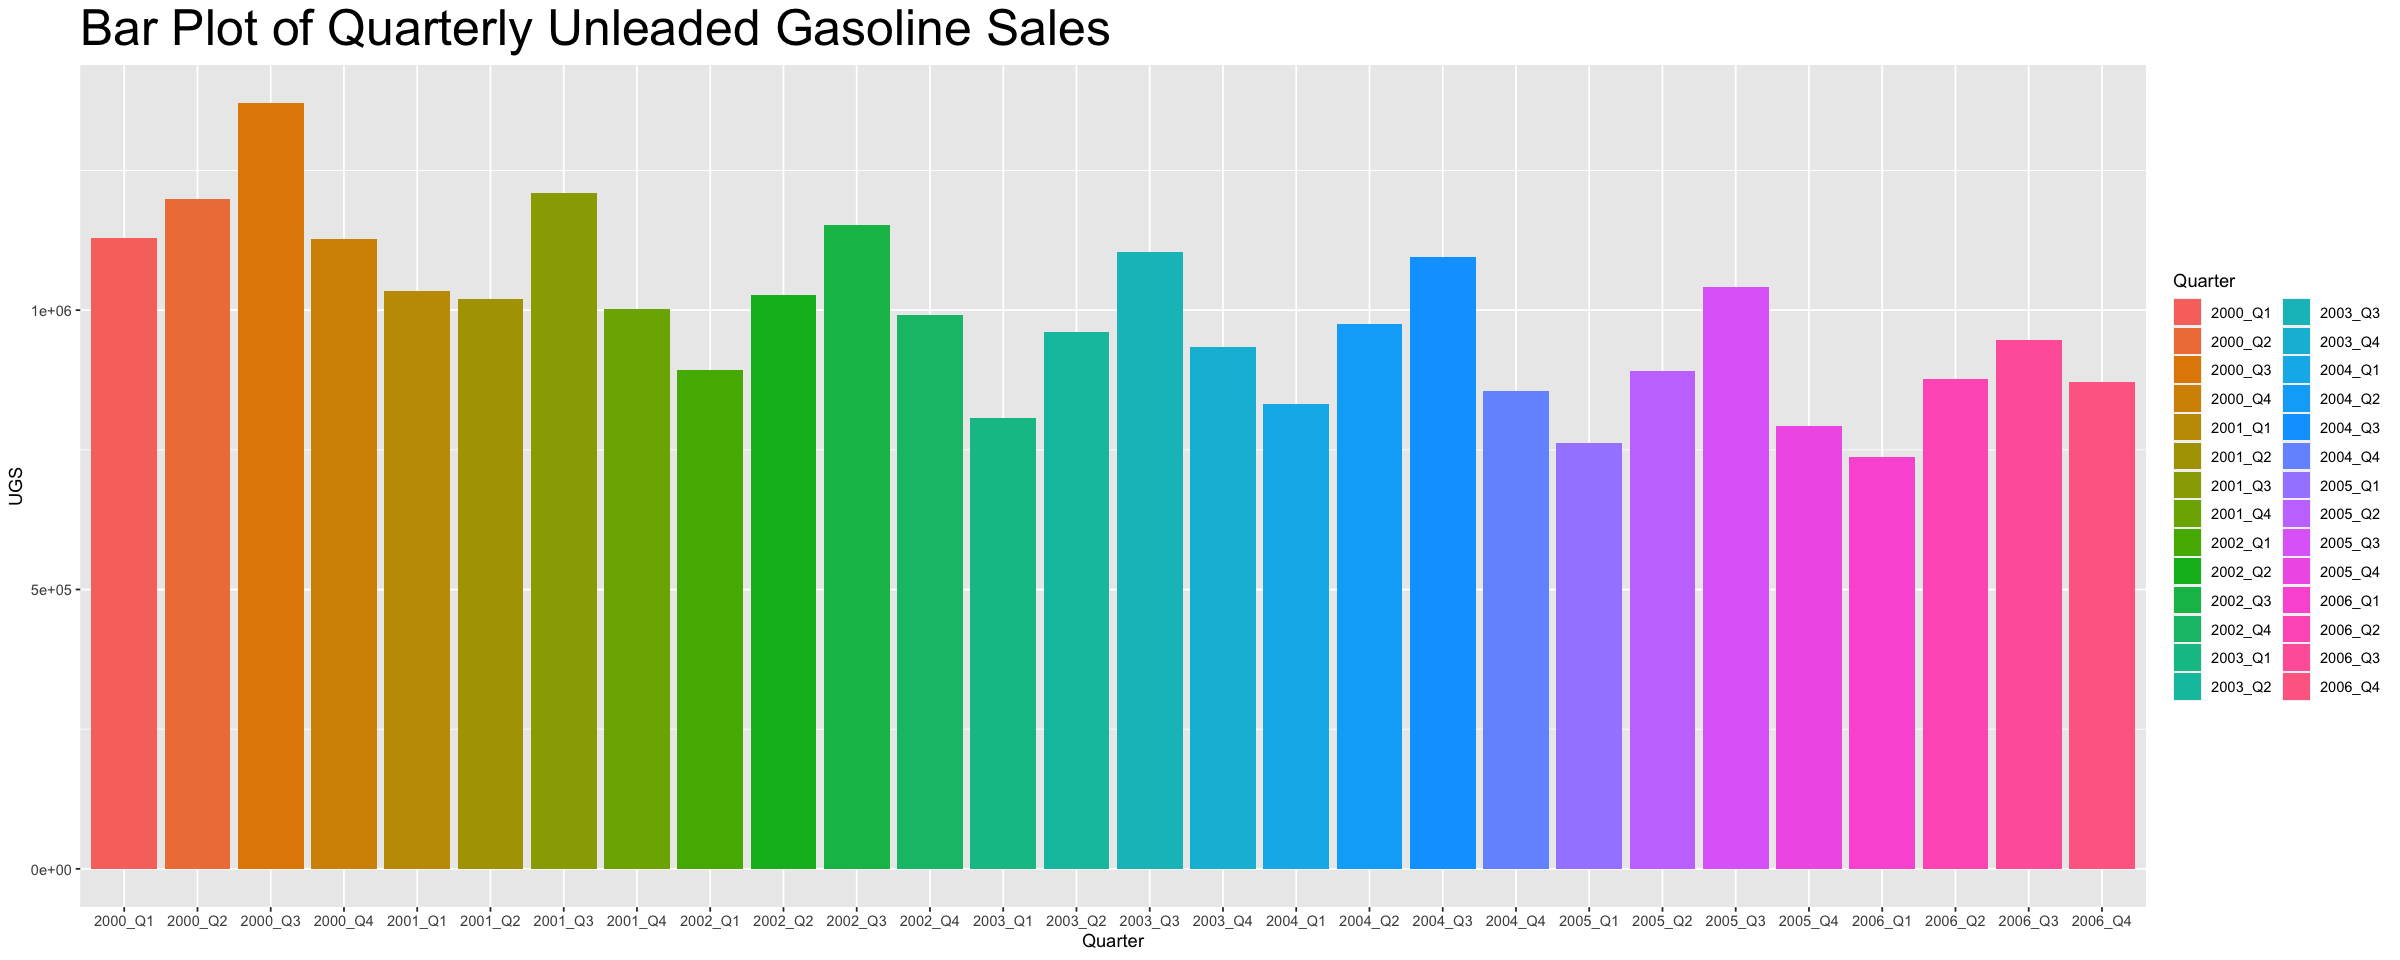

In [5]:
options(repr.plot.width = 20, repr.plot.height =8)
ggplot(gasoline[1:28,], aes(x = Quarter, y = Unleaded.Gasoline.Sale..UGS.)) + 
geom_bar(stat='identity', aes(fill=Quarter))+
ggtitle("Bar Plot of Quarterly Unleaded Gasoline Sales") + theme(plot.title = element_text(size=30)) +
xlab("Quarter")+
ylab("UGS")

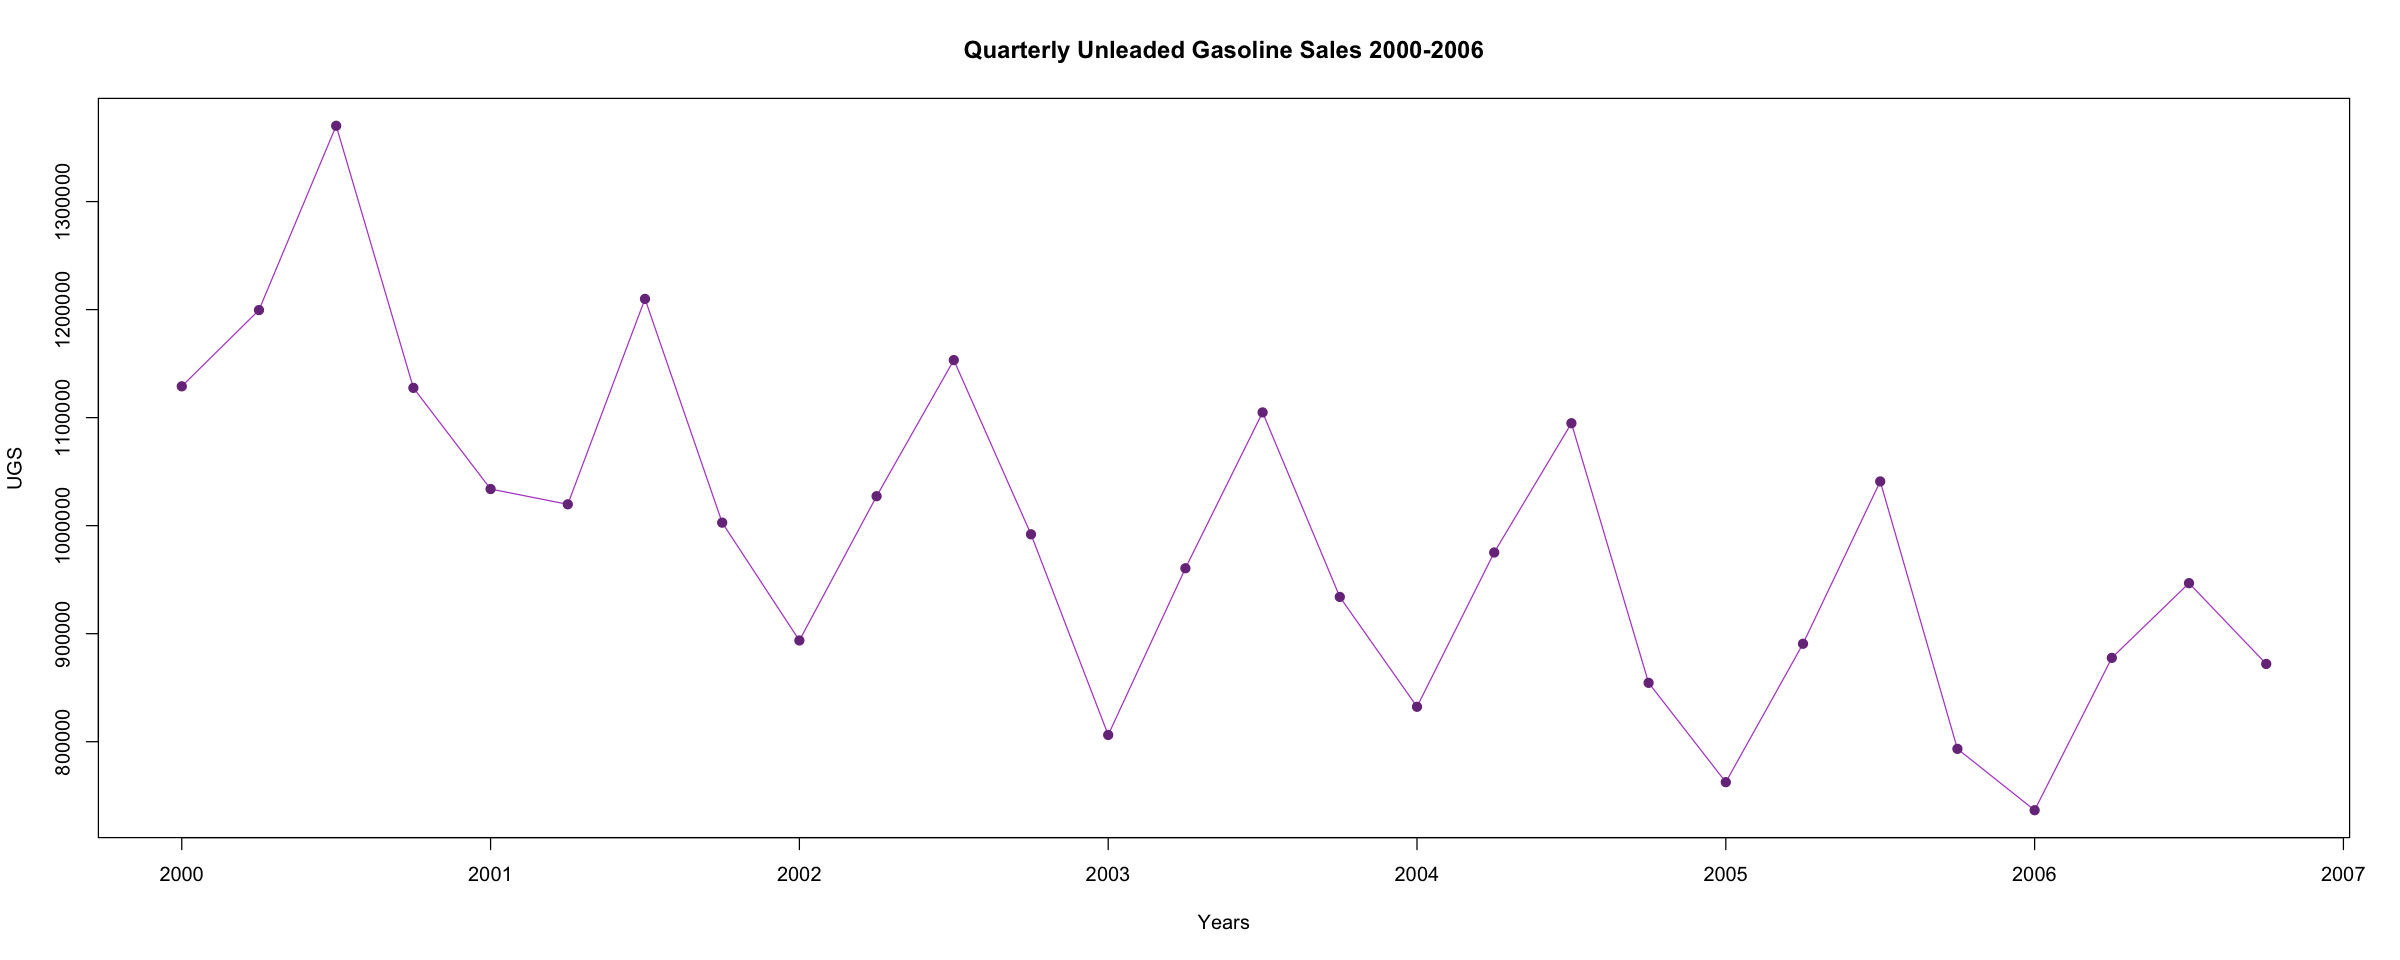

In [6]:
ts = ts(gasoline[,c(2:10)],freq= 4,start = c(2000,1),end = c(2006,4))
ts.plot(ts[,'Unleaded.Gasoline.Sale..UGS.'],xlab = "Years",ylab = "UGS", main = "Quarterly Unleaded Gasoline Sales 2000-2006",col= rep("mediumorchid3",4))
index = 2000 + c(0:27) / 4
points(index, gasoline$Unleaded.Gasoline.Sale..UGS.[1:28], col = "mediumorchid4", pch=19)

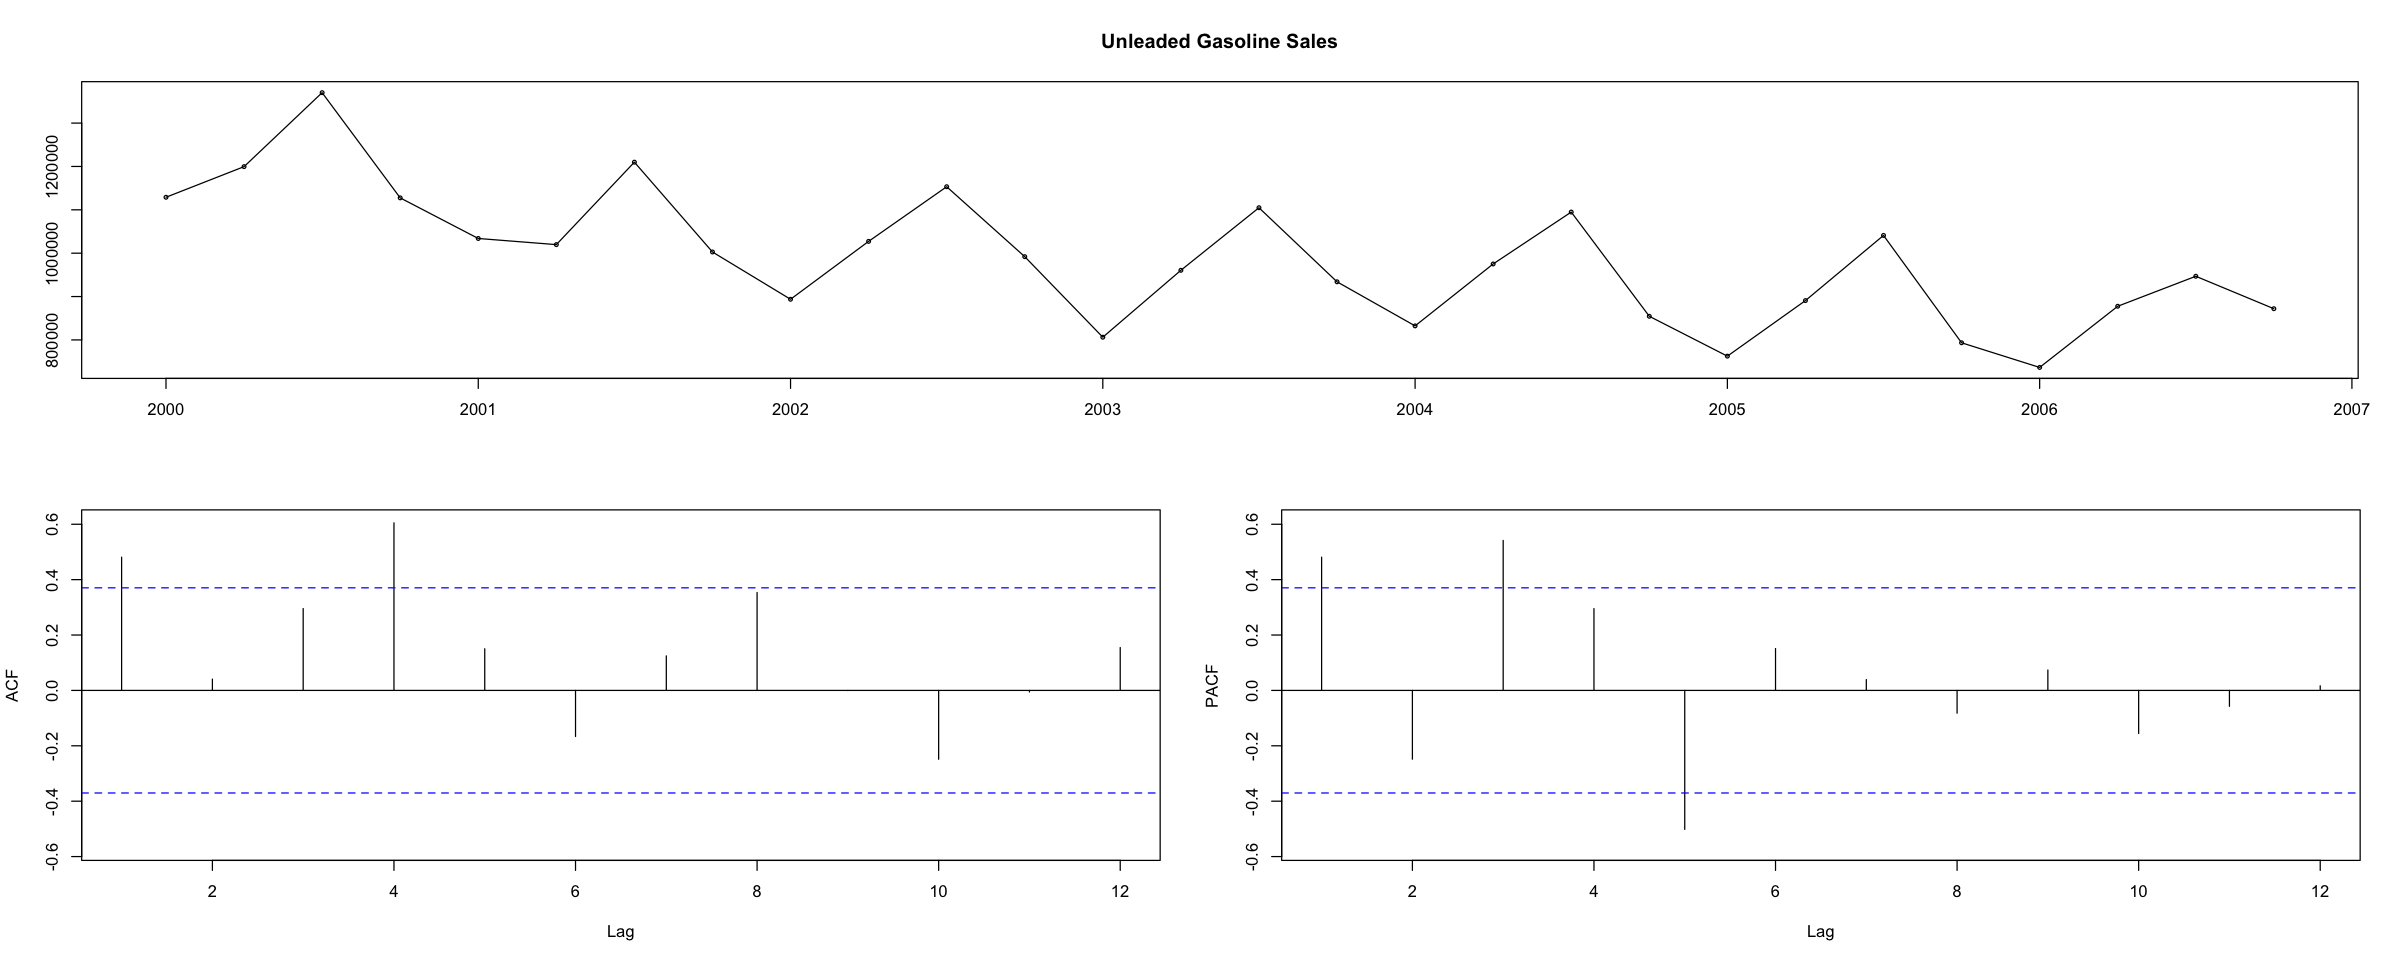

In [7]:
tsdisplay(ts[,1],lag.max = 12,main = 'Unleaded Gasoline Sales')

In [8]:
gasoline$trend = c(1:32)
gasoline$seasonality = as.factor(rep(c(1:4),8))
head(gasoline)

Quarter,Unleaded.Gasoline.Sale..UGS.,RNUV,X..LPG.Vehicles..NLPG.,Price.of.Unleaded.Gasoline..PU.,Price.of.Diesel.Gasoline..PG.,X..Unleaded.Gasoline.Vehicles..NUGV.,X..of.Diesel.Gasoline.Vehicles..NDGV.,GNP.Agriculture,GNP.Commerce,GNP.Total,trend,seasonality
2000_Q1,1128971,0.0146,940000,469.03,355.69,4647500,281.9853,1040173,3483132,18022686,1,1
2000_Q2,1199569,0.0205,941000,459.42,344.58,4742876,284.0813,1760460,4525451,21797130,2,2
2000_Q3,1370167,0.0207,943500,439.98,327.21,4840931,286.7169,6974808,5915204,30050207,3,3
2000_Q4,1127548,0.0163,948000,402.08,300.67,4919685,288.3137,3267125,4929778,24480153,4,4
2001_Q1,1033918,0.0071,950000,411.58,305.75,4954754,287.6237,1004528,3418387,15832648,5,1
2001_Q2,1019754,0.0051,955000,520.39,374.78,4980204,287.8814,1449357,4359831,20296918,6,2


In [9]:
ts = ts(gasoline[,c(2:13)],freq= 4,start = c(2000,1),end = c(2006,4))
head(ts)

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : biçimsel argüman "cols" birden çok gerçek argümanla eşleşti

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::

,Unleaded.Gasoline.Sale..UGS.,RNUV,X..LPG.Vehicles..NLPG.,Price.of.Unleaded.Gasoline..PU.,Price.of.Diesel.Gasoline..PG.,X..Unleaded.Gasoline.Vehicles..NUGV.,X..of.Diesel.Gasoline.Vehicles..NDGV.,GNP.Agriculture,GNP.Commerce,GNP.Total,trend,seasonality
2000 Q1,1128971,0.0146,940000,469.03,355.69,4647500,281.9853,1040173,3483132,18022686,1,1
2000 Q2,1199569,0.0205,941000,459.42,344.58,4742876,284.0813,1760460,4525451,21797130,2,2
2000 Q3,1370167,0.0207,943500,439.98,327.21,4840931,286.7169,6974808,5915204,30050207,3,3
2000 Q4,1127548,0.0163,948000,402.08,300.67,4919685,288.3137,3267125,4929778,24480153,4,4
2001 Q1,1033918,0.0071,950000,411.58,305.75,4954754,287.6237,1004528,3418387,15832648,5,1
2001 Q2,1019754,0.0051,955000,520.39,374.78,4980204,287.8814,1449357,4359831,20296918,6,2



Call:
lm(formula = Unleaded.Gasoline.Sale..UGS. ~ . + as.factor(seasonality) - 
    seasonality, data = ts)

Residuals:
   Min     1Q Median     3Q    Max 
-59869 -10668   2227  12576  32299 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)   
(Intercept)                            3.969e+06  1.007e+06   3.940  0.00148 **
RNUV                                   3.386e+06  2.201e+06   1.538  0.14624   
X..LPG.Vehicles..NLPG.                -6.013e-01  2.471e-01  -2.433  0.02895 * 
Price.of.Unleaded.Gasoline..PU.        1.407e+03  1.310e+03   1.074  0.30097   
Price.of.Diesel.Gasoline..PG.         -3.477e+03  2.018e+03  -1.723  0.10692   
X..Unleaded.Gasoline.Vehicles..NUGV.  -1.249e+00  3.709e-01  -3.368  0.00459 **
X..of.Diesel.Gasoline.Vehicles..NDGV.  1.393e+04  3.831e+03   3.635  0.00270 **
GNP.Agriculture                       -7.238e-02  4.191e-02  -1.727  0.10617   
GNP.Commerce                           1.104e-01  7.019e-02   1.573  0.1

ERROR: Error in chol2inv(auxfit$qr$qr): 'size' nrow(x) = 28 i geçemez


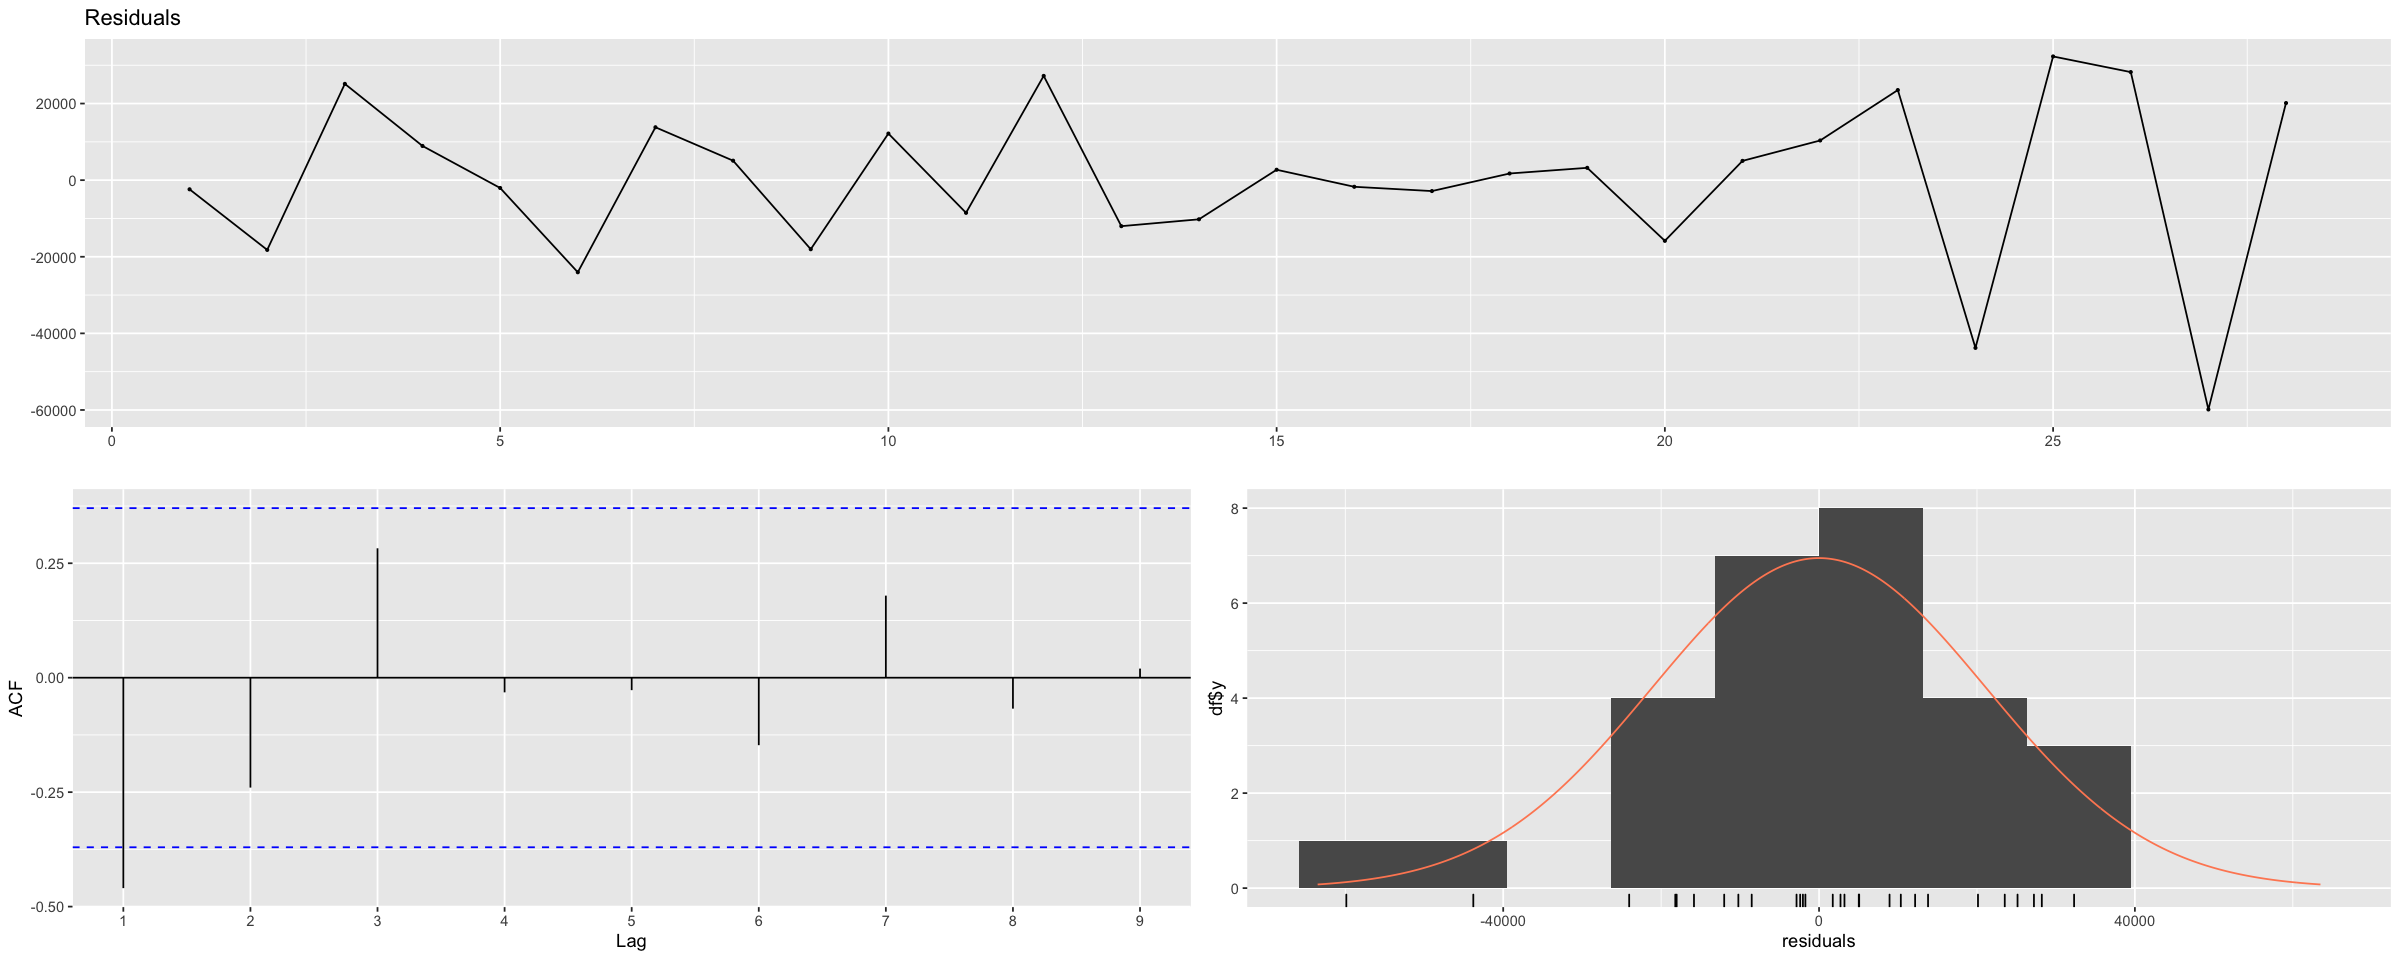

In [10]:
model1 = lm(Unleaded.Gasoline.Sale..UGS.~.  + as.factor(seasonality) - seasonality, ts)
summary(model1)
checkresiduals(model1)


Call:
lm(formula = Unleaded.Gasoline.Sale..UGS. ~ . + as.factor(seasonality) - 
    RNUV - seasonality, data = ts)

Residuals:
   Min     1Q Median     3Q    Max 
-66699  -8286   -382  17148  37055 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)   
(Intercept)                            3.359e+06  9.673e+05   3.472  0.00341 **
X..LPG.Vehicles..NLPG.                -4.089e-01  2.226e-01  -1.837  0.08613 . 
Price.of.Unleaded.Gasoline..PU.        5.881e+02  1.251e+03   0.470  0.64493   
Price.of.Diesel.Gasoline..PG.         -2.053e+03  1.873e+03  -1.096  0.29039   
X..Unleaded.Gasoline.Vehicles..NUGV.  -1.139e+00  3.801e-01  -2.997  0.00903 **
X..of.Diesel.Gasoline.Vehicles..NDGV.  1.352e+04  3.992e+03   3.386  0.00407 **
GNP.Agriculture                       -4.668e-02  4.015e-02  -1.163  0.26316   
GNP.Commerce                           6.261e-02  6.573e-02   0.953  0.35592   
GNP.Total                             -5.064e-03  1.414e-02  -0.3

ERROR: Error in chol2inv(auxfit$qr$qr): 'size' nrow(x) = 28 i geçemez


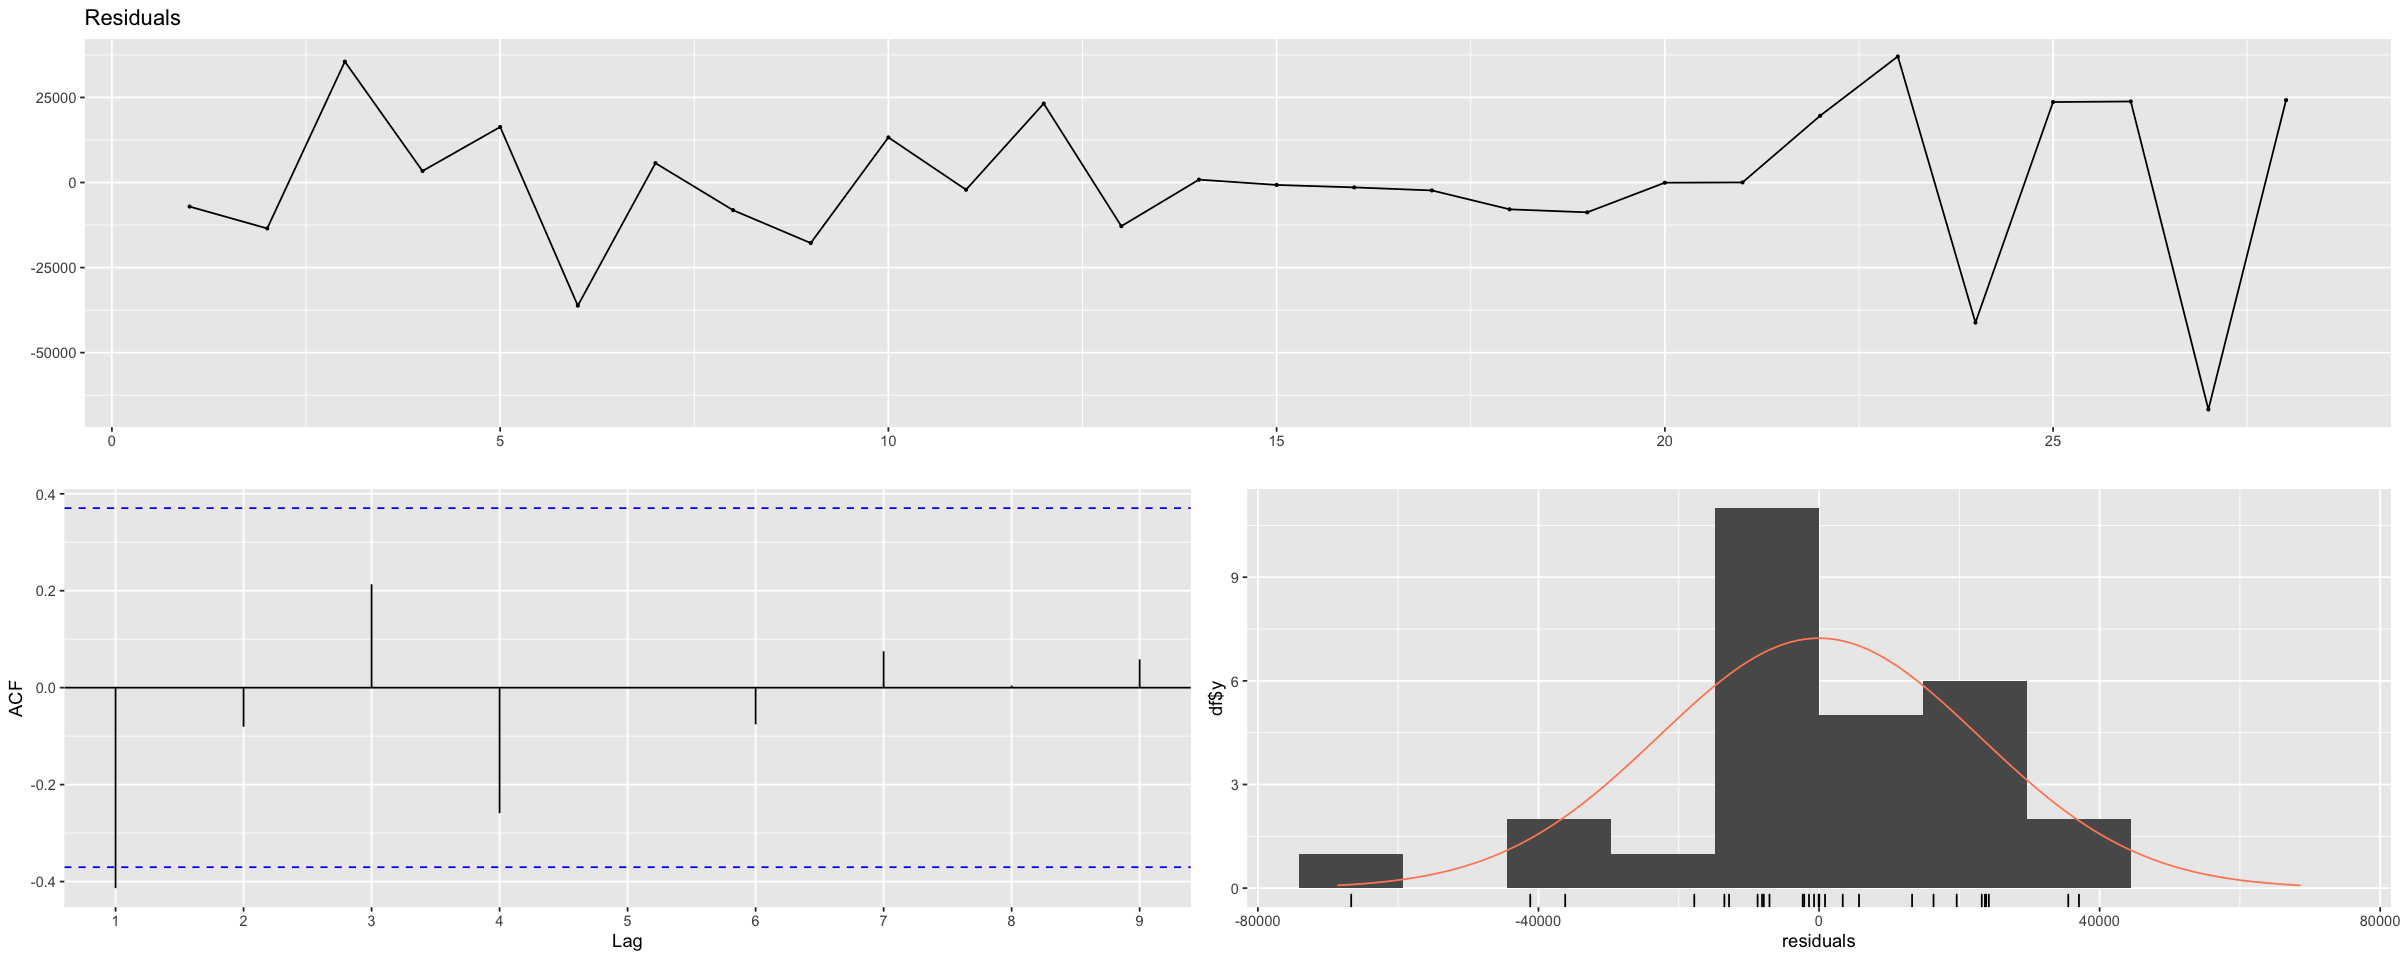

In [11]:
model2 = lm(Unleaded.Gasoline.Sale..UGS.~.+ as.factor(seasonality) - RNUV - seasonality , ts)
summary(model2)
checkresiduals(model2)


Call:
lm(formula = Unleaded.Gasoline.Sale..UGS. ~ . + as.factor(seasonality) - 
    RNUV - Price.of.Unleaded.Gasoline..PU. - seasonality, data = ts)

Residuals:
   Min     1Q Median     3Q    Max 
-66656  -8174   -289  16943  36771 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)   
(Intercept)                            3.157e+06  8.457e+05   3.733  0.00181 **
X..LPG.Vehicles..NLPG.                -3.422e-01  1.673e-01  -2.045  0.05763 . 
Price.of.Diesel.Gasoline..PG.         -1.190e+03  3.706e+02  -3.213  0.00543 **
X..Unleaded.Gasoline.Vehicles..NUGV.  -1.043e+00  3.119e-01  -3.342  0.00413 **
X..of.Diesel.Gasoline.Vehicles..NDGV.  1.251e+04  3.280e+03   3.813  0.00153 **
GNP.Agriculture                       -4.038e-02  3.692e-02  -1.094  0.29026   
GNP.Commerce                           4.809e-02  5.659e-02   0.850  0.40802   
GNP.Total                             -5.481e-03  1.376e-02  -0.398  0.69567   
trend                          


	Breusch-Godfrey test for serial correlation of order up to 15

data:  Residuals
LM test = 27.944, df = 15, p-value = 0.02193


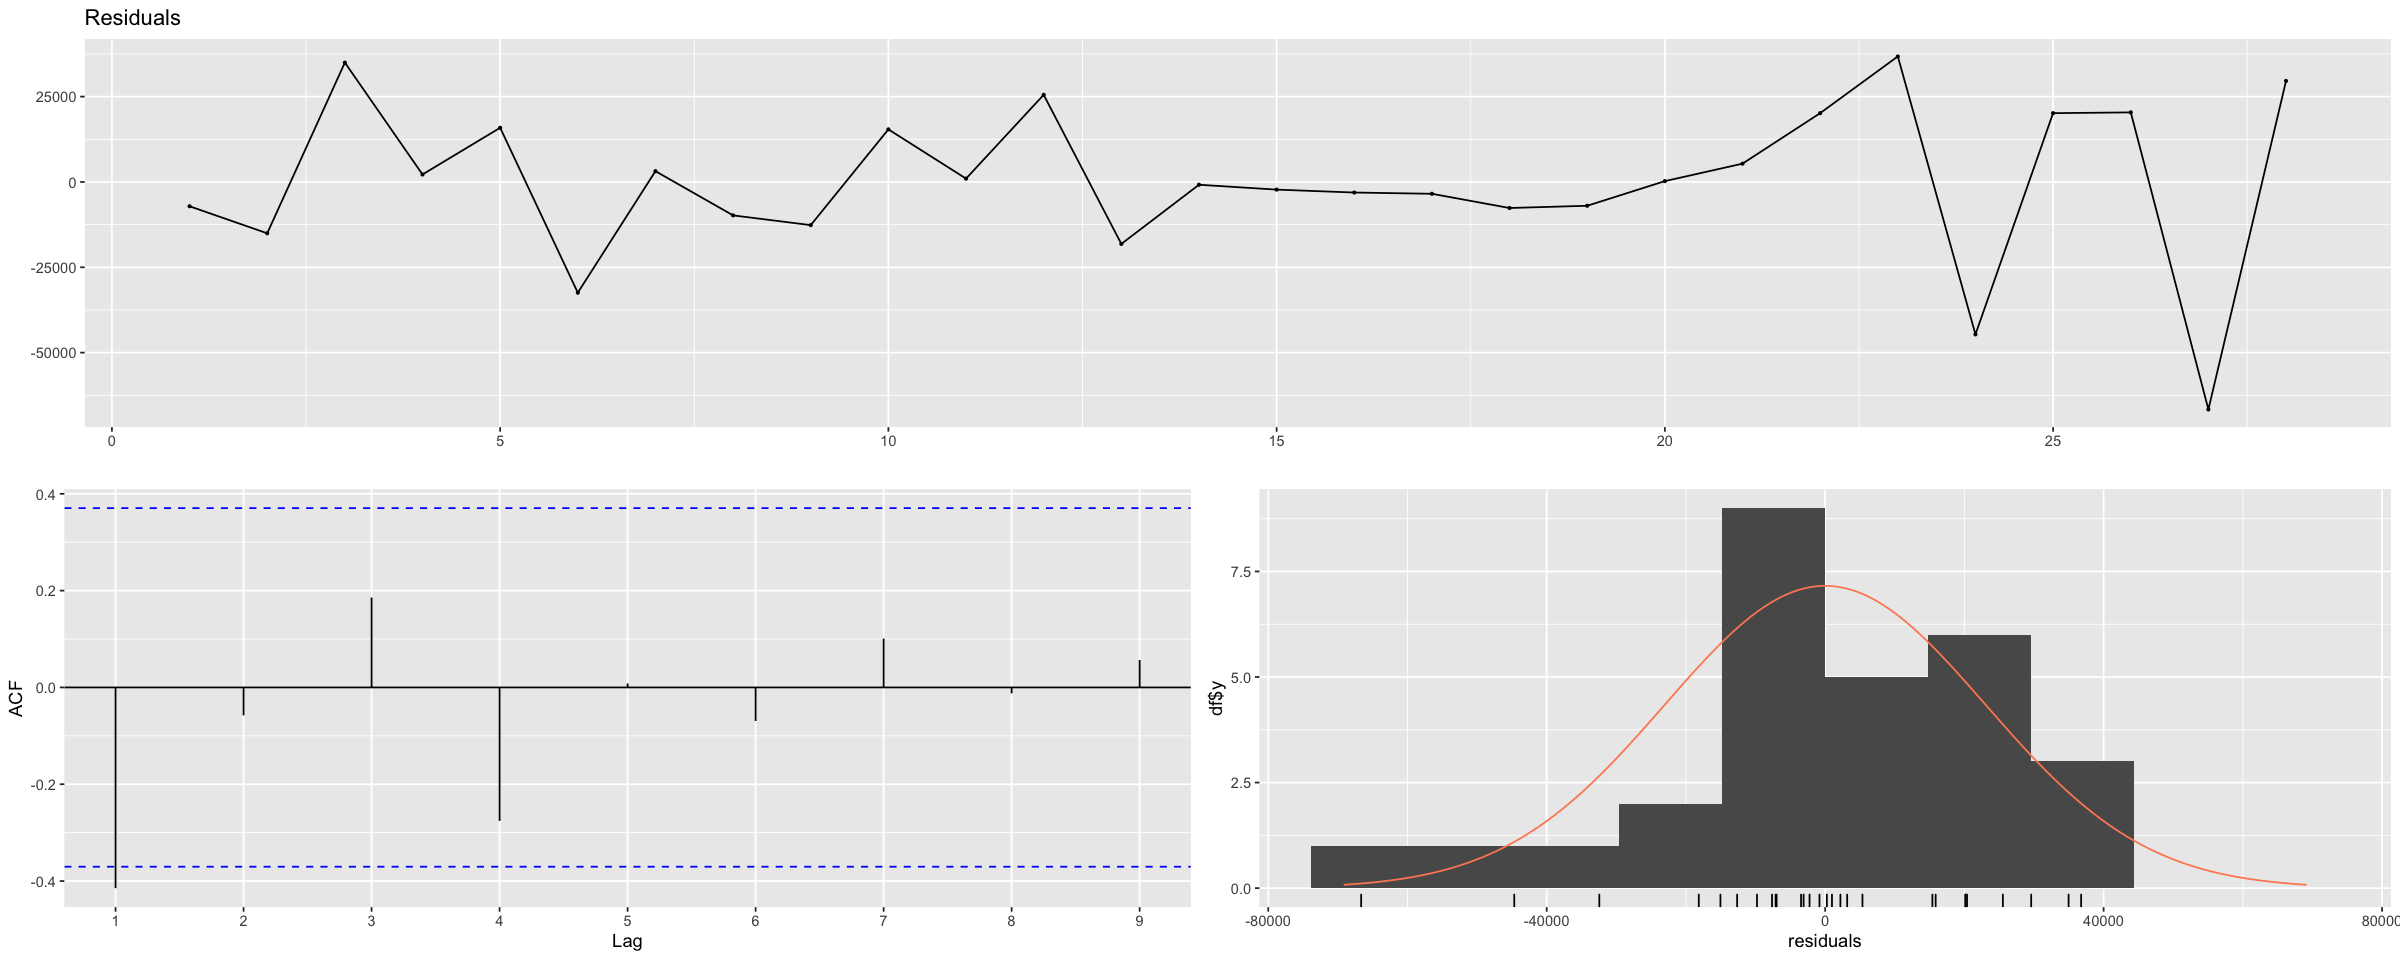

In [12]:
model3 = lm(Unleaded.Gasoline.Sale..UGS.~.+ as.factor(seasonality) - RNUV - Price.of.Unleaded.Gasoline..PU. - seasonality , ts)
summary(model3)
checkresiduals(model3)


Call:
lm(formula = Unleaded.Gasoline.Sale..UGS. ~ . + as.factor(seasonality) - 
    RNUV - Price.of.Unleaded.Gasoline..PU. - GNP.Agriculture - 
    seasonality, data = ts)

Residuals:
   Min     1Q Median     3Q    Max 
-66287 -11240  -1318  14543  39715 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)   
(Intercept)                            3.179e+06  8.504e+05   3.738  0.00164 **
X..LPG.Vehicles..NLPG.                -3.023e-01  1.642e-01  -1.841  0.08318 . 
Price.of.Diesel.Gasoline..PG.         -9.058e+02  2.653e+02  -3.415  0.00330 **
X..Unleaded.Gasoline.Vehicles..NUGV.  -1.036e+00  3.136e-01  -3.302  0.00421 **
X..of.Diesel.Gasoline.Vehicles..NDGV.  1.226e+04  3.291e+03   3.725  0.00168 **
GNP.Commerce                           4.008e-02  5.644e-02   0.710  0.48726   
GNP.Total                             -1.307e-02  1.195e-02  -1.093  0.28961   
trend                                  1.639e+04  1.175e+04   1.394  0.18122   
as.facto


	Breusch-Godfrey test for serial correlation of order up to 14

data:  Residuals
LM test = 27.683, df = 14, p-value = 0.01567


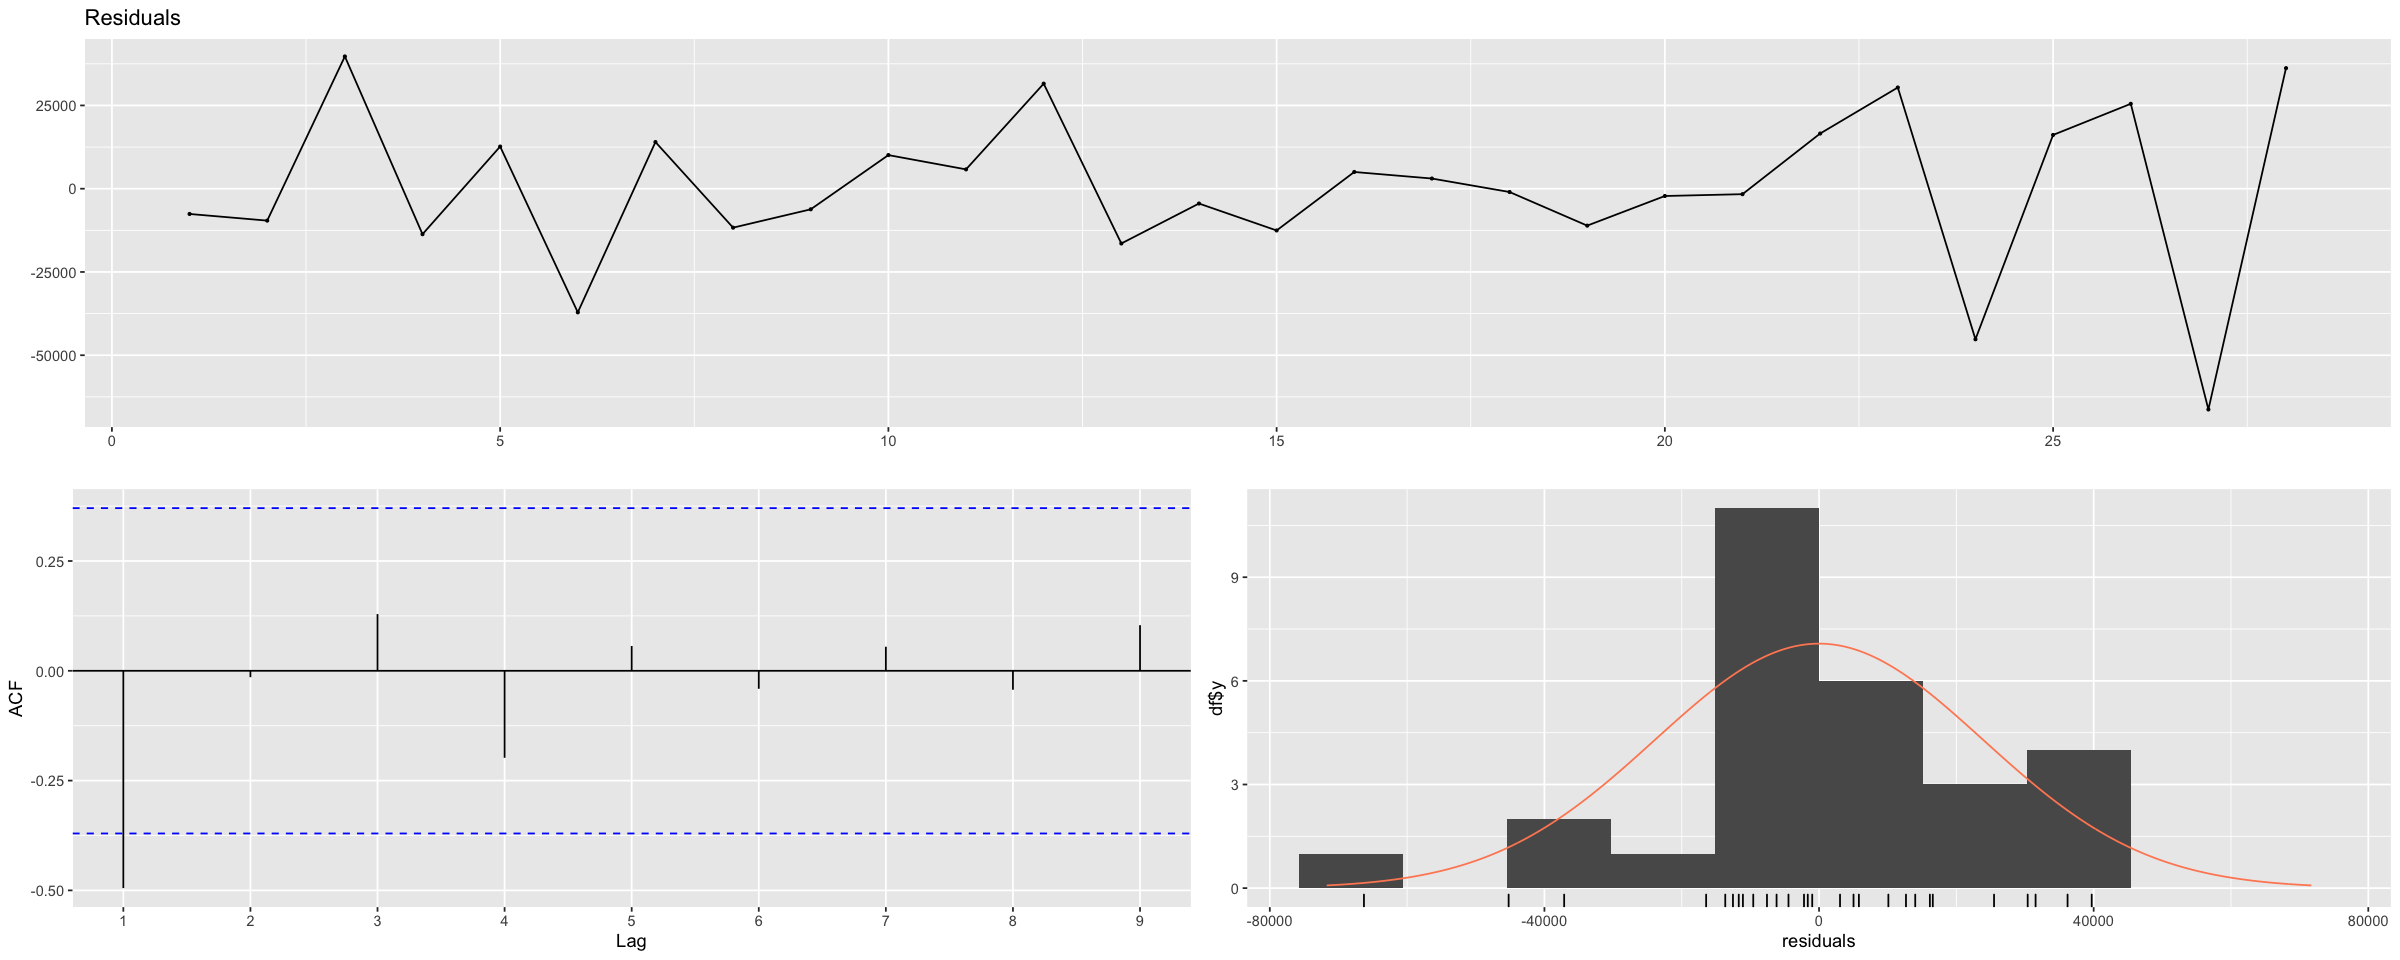

In [13]:
model4 = lm(Unleaded.Gasoline.Sale..UGS.~.+ as.factor(seasonality) - RNUV - Price.of.Unleaded.Gasoline..PU. - GNP.Agriculture - seasonality , ts)
summary(model4)
checkresiduals(model4)


Call:
lm(formula = Unleaded.Gasoline.Sale..UGS. ~ . + as.factor(seasonality) - 
    RNUV - Price.of.Unleaded.Gasoline..PU. - GNP.Agriculture - 
    GNP.Commerce - seasonality, data = ts)

Residuals:
   Min     1Q Median     3Q    Max 
-67280 -10657    689  15964  37986 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                            3.111e+06  8.333e+05   3.733  0.00152
X..LPG.Vehicles..NLPG.                -2.626e-01  1.523e-01  -1.725  0.10173
Price.of.Diesel.Gasoline..PG.         -8.521e+02  2.507e+02  -3.398  0.00320
X..Unleaded.Gasoline.Vehicles..NUGV.  -1.015e+00  3.080e-01  -3.295  0.00402
X..of.Diesel.Gasoline.Vehicles..NDGV.  1.212e+04  3.239e+03   3.741  0.00149
GNP.Total                             -7.679e-03  9.109e-03  -0.843  0.41032
trend                                  1.515e+04  1.146e+04   1.322  0.20285
as.factor(seasonality)2                1.471e+05  3.014e+04   4.881  0.00012
as.factor(seasonalit


	Breusch-Godfrey test for serial correlation of order up to 13

data:  Residuals
LM test = 24.204, df = 13, p-value = 0.0293


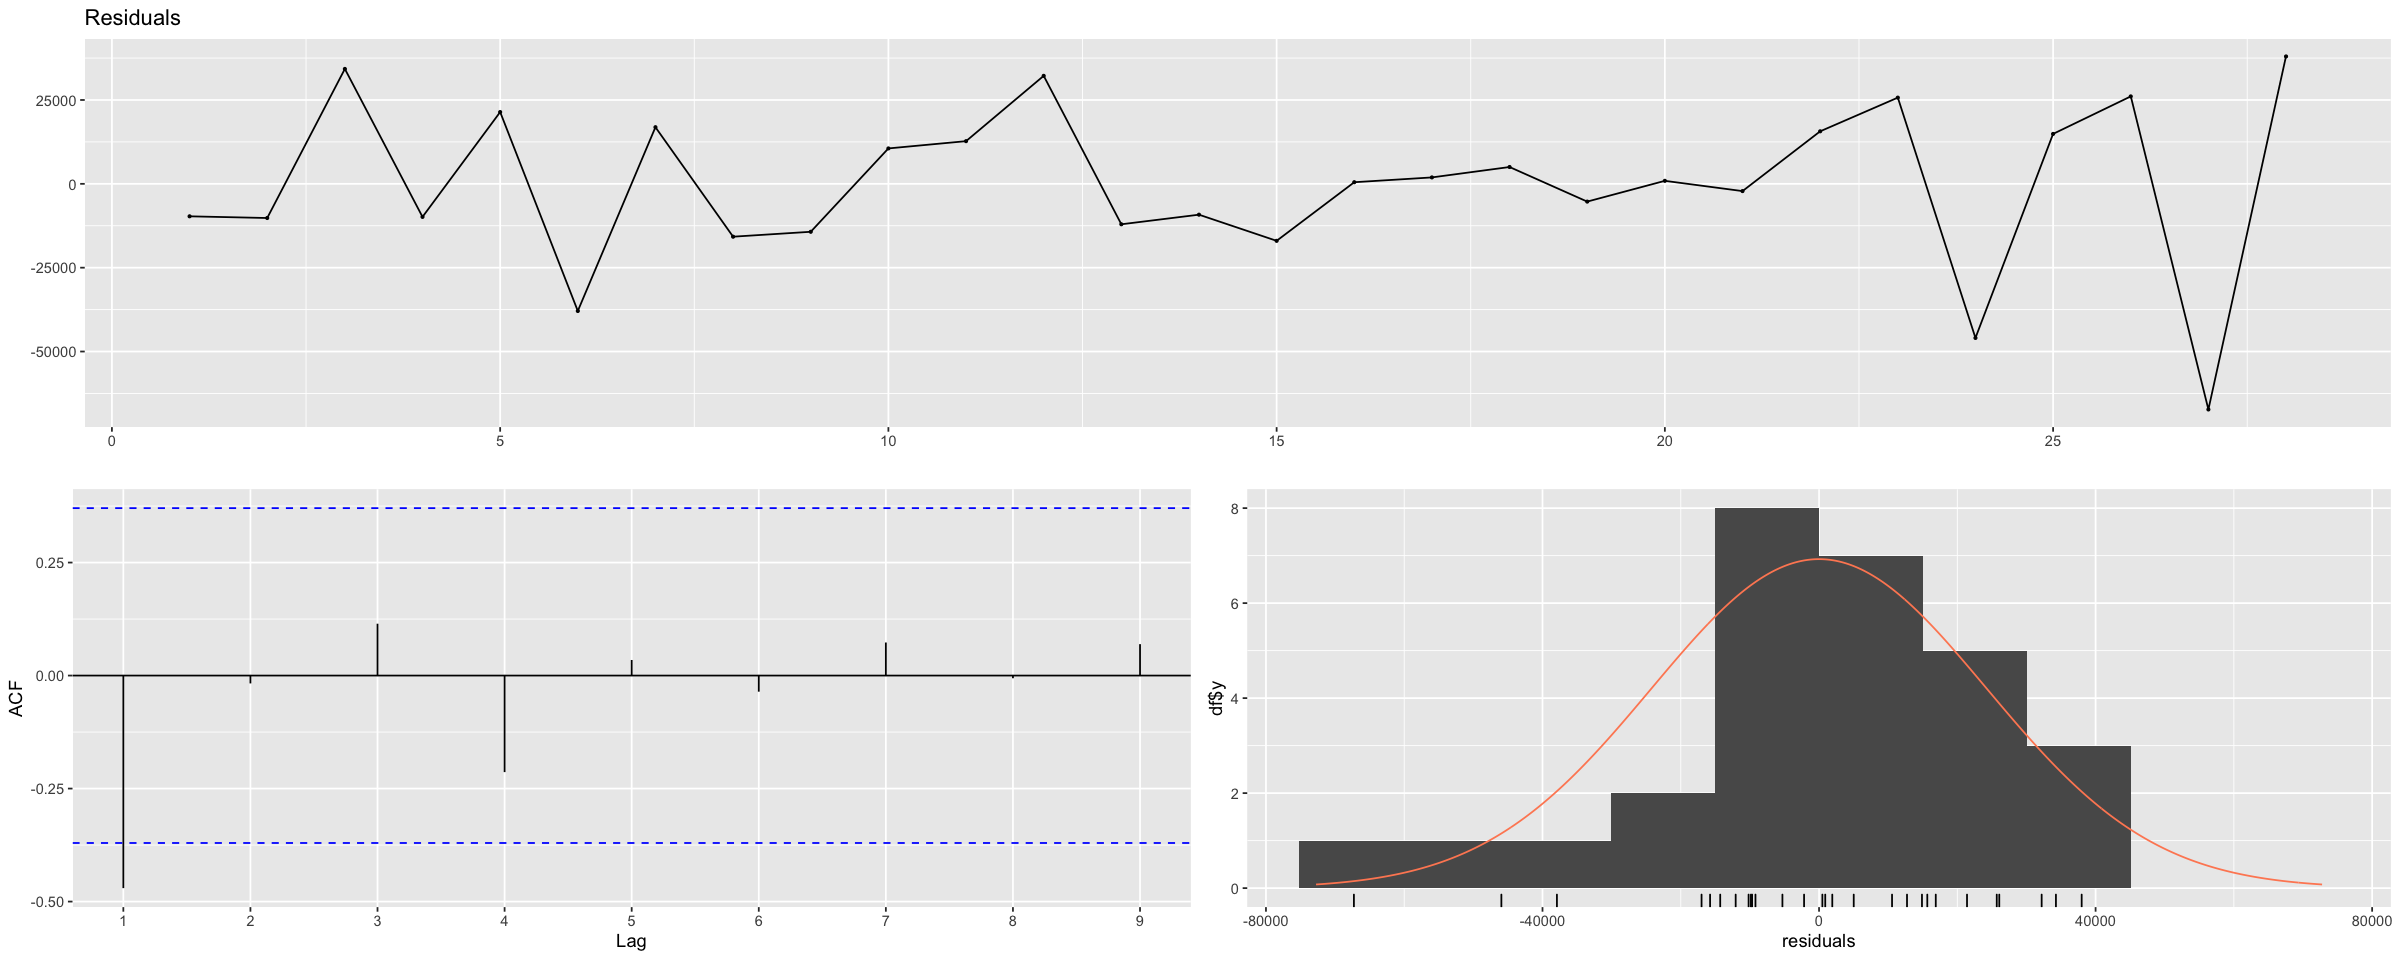

In [14]:
model5 = lm(Unleaded.Gasoline.Sale..UGS.~.+ as.factor(seasonality) - RNUV - Price.of.Unleaded.Gasoline..PU. - GNP.Agriculture - GNP.Commerce - seasonality , ts)
summary(model5)
checkresiduals(model5)


Call:
lm(formula = Unleaded.Gasoline.Sale..UGS. ~ . + as.factor(seasonality) - 
    RNUV - Price.of.Unleaded.Gasoline..PU. - GNP.Agriculture - 
    GNP.Commerce - GNP.Total - seasonality, data = ts)

Residuals:
   Min     1Q Median     3Q    Max 
-67628 -15230   -744  17814  41076 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                            2.626e+06  5.981e+05   4.390 0.000315
X..LPG.Vehicles..NLPG.                -2.248e-01  1.444e-01  -1.557 0.136069
Price.of.Diesel.Gasoline..PG.         -8.344e+02  2.479e+02  -3.365 0.003250
X..Unleaded.Gasoline.Vehicles..NUGV.  -8.443e-01  2.304e-01  -3.664 0.001649
X..of.Diesel.Gasoline.Vehicles..NDGV.  1.038e+04  2.478e+03   4.188 0.000499
trend                                  8.951e+03  8.726e+03   1.026 0.317894
as.factor(seasonality)2                1.256e+05  1.592e+04   7.891 2.05e-07
as.factor(seasonality)3                2.876e+05  1.619e+04  17.768 2.70e-13
as.facto


	Breusch-Godfrey test for serial correlation of order up to 12

data:  Residuals
LM test = 20.78, df = 12, p-value = 0.0537


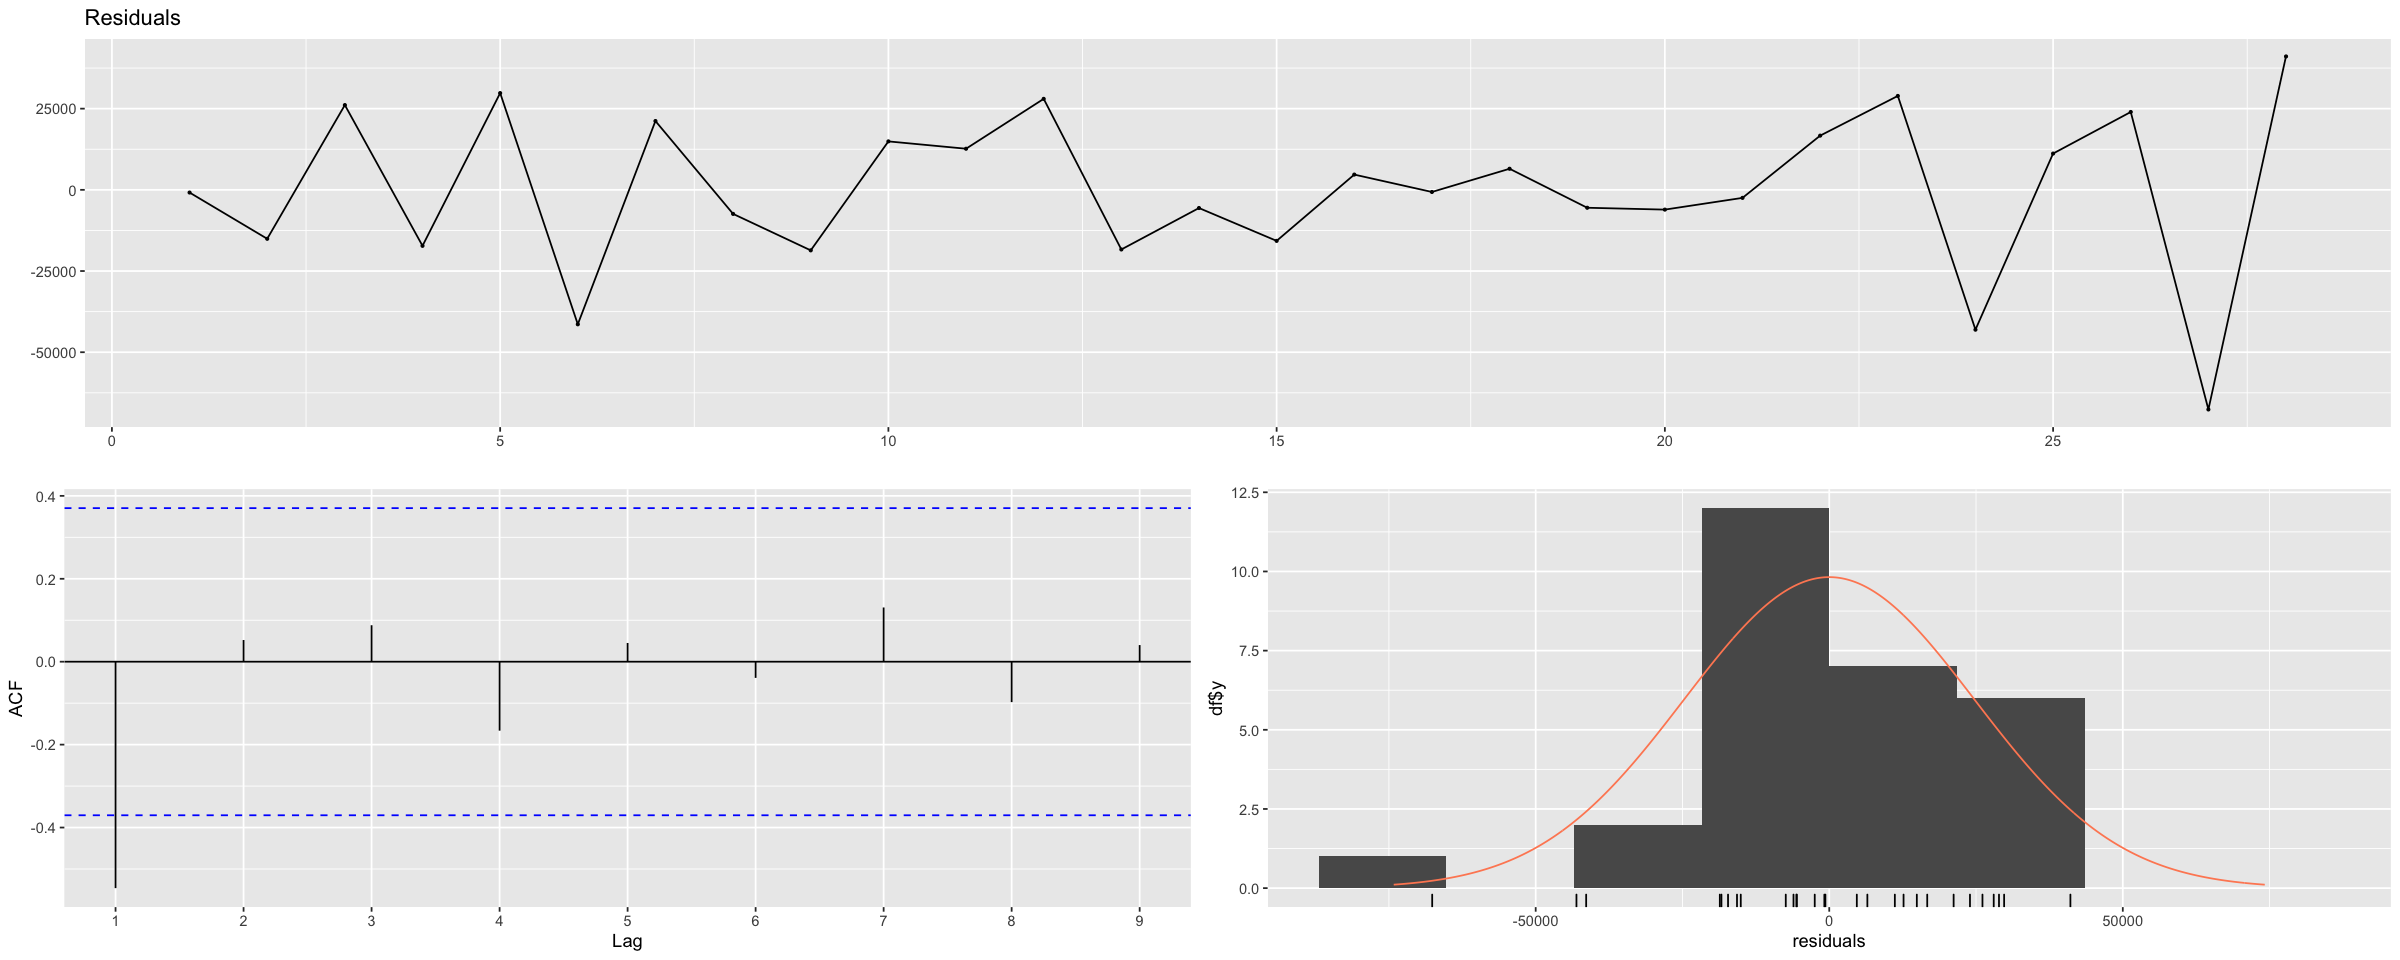

In [15]:
model6 = lm(Unleaded.Gasoline.Sale..UGS.~.+ as.factor(seasonality) - RNUV - Price.of.Unleaded.Gasoline..PU. - GNP.Agriculture - GNP.Commerce - GNP.Total - seasonality , ts)
summary(model6)
checkresiduals(model6)


Call:
lm(formula = Unleaded.Gasoline.Sale..UGS. ~ . + as.factor(seasonality) - 
    RNUV - Price.of.Unleaded.Gasoline..PU. - GNP.Agriculture - 
    GNP.Commerce - GNP.Total - X..LPG.Vehicles..NLPG. - seasonality, 
    data = ts)

Residuals:
   Min     1Q Median     3Q    Max 
-59059 -13018    822  15582  54366 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                            1.942e+06  4.200e+05   4.623 0.000164
Price.of.Diesel.Gasoline..PG.         -6.535e+02  2.267e+02  -2.883 0.009198
X..Unleaded.Gasoline.Vehicles..NUGV.  -5.508e-01  1.370e-01  -4.020 0.000672
X..of.Diesel.Gasoline.Vehicles..NDGV.  6.996e+03  1.231e+03   5.682 1.46e-05
trend                                 -3.554e+03  3.527e+03  -1.007 0.325749
as.factor(seasonality)2                1.279e+05  1.640e+04   7.801 1.72e-07
as.factor(seasonality)3                2.879e+05  1.675e+04  17.187 1.91e-13
as.factor(seasonality)4                1.042e+05  1.708


	Breusch-Godfrey test for serial correlation of order up to 11

data:  Residuals
LM test = 18, df = 11, p-value = 0.08159


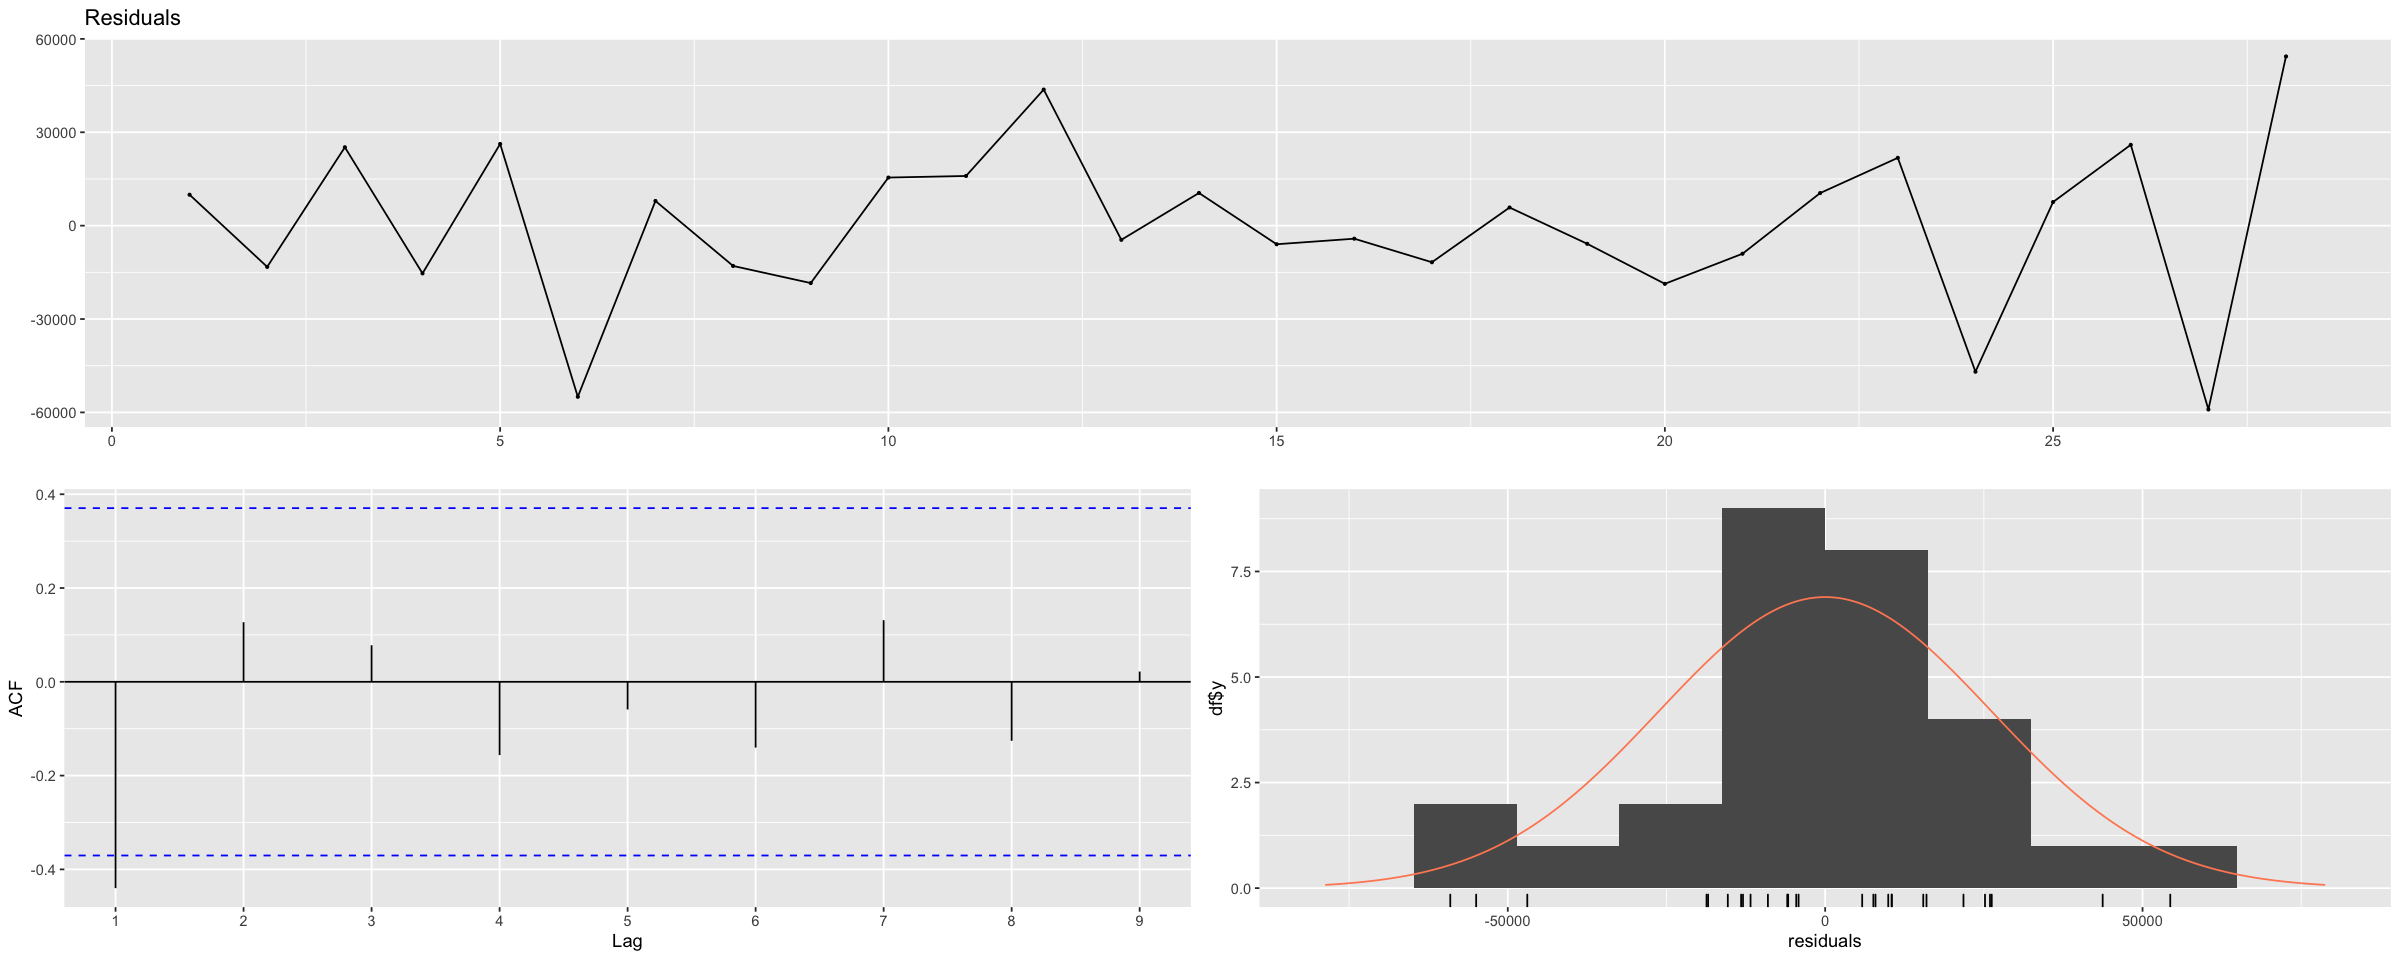

In [16]:
model7 = lm(Unleaded.Gasoline.Sale..UGS.~.+ as.factor(seasonality) - RNUV - Price.of.Unleaded.Gasoline..PU. - GNP.Agriculture - GNP.Commerce - GNP.Total - X..LPG.Vehicles..NLPG. - seasonality , ts)
summary(model7)
checkresiduals(model7)


Call:
lm(formula = Unleaded.Gasoline.Sale..UGS. ~ +as.factor(seasonality) + 
    X..of.Diesel.Gasoline.Vehicles..NDGV. + X..Unleaded.Gasoline.Vehicles..NUGV. + 
    Price.of.Diesel.Gasoline..PG., data = ts)

Residuals:
   Min     1Q Median     3Q    Max 
-56788 -14764  -2493  20101  57289 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                            2.347e+06  1.207e+05  19.441 6.60e-15
as.factor(seasonality)2                1.291e+05  1.637e+04   7.884 1.04e-07
as.factor(seasonality)3                2.904e+05  1.656e+04  17.535 5.11e-14
as.factor(seasonality)4                1.076e+05  1.674e+04   6.428 2.27e-06
X..of.Diesel.Gasoline.Vehicles..NDGV.  7.638e+03  1.053e+03   7.251 3.84e-07
X..Unleaded.Gasoline.Vehicles..NUGV.  -6.706e-01  6.795e-02  -9.870 2.44e-09
Price.of.Diesel.Gasoline..PG.         -7.218e+02  2.164e+02  -3.336  0.00313
                                         
(Intercept)                        


	Breusch-Godfrey test for serial correlation of order up to 10

data:  Residuals
LM test = 13.437, df = 10, p-value = 0.2003


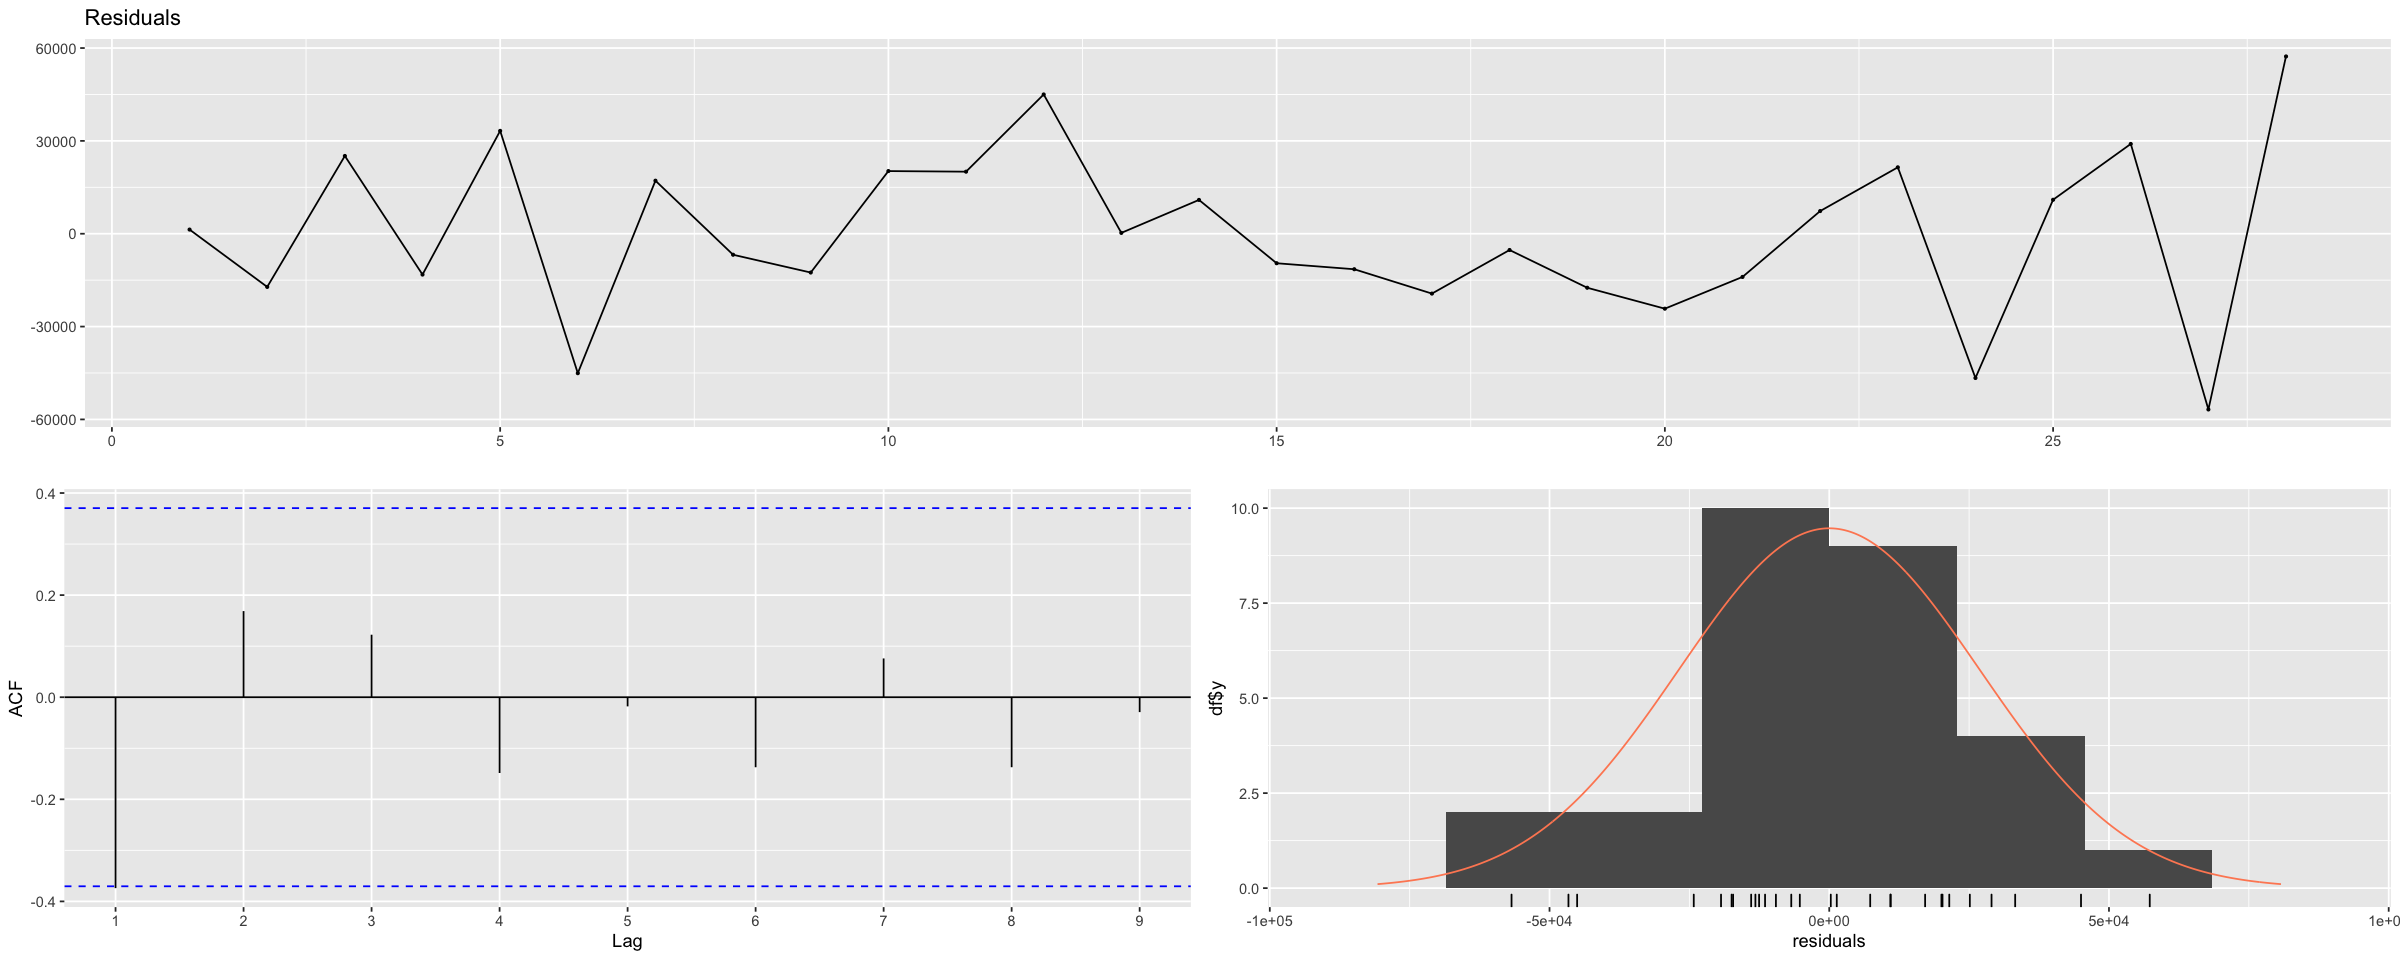

In [17]:
model8 = lm(Unleaded.Gasoline.Sale..UGS.~ + as.factor(seasonality) +X..of.Diesel.Gasoline.Vehicles..NDGV.+X..Unleaded.Gasoline.Vehicles..NUGV.+Price.of.Diesel.Gasoline..PG., ts)
summary(model8)
checkresiduals(model8)

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : biçimsel argüman "cols" birden çok gerçek argümanla eşleşti

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::

,Unleaded.Gasoline.Sale..UGS.,RNUV,X..LPG.Vehicles..NLPG.,Price.of.Unleaded.Gasoline..PU.,Price.of.Diesel.Gasoline..PG.,X..Unleaded.Gasoline.Vehicles..NUGV.,X..of.Diesel.Gasoline.Vehicles..NDGV.,GNP.Agriculture,GNP.Commerce,GNP.Total,trend,seasonality,lag4
2000 Q1,1128971,0.0146,940000,469.03,355.69,4647500,281.9853,1040173,3483132,18022686,1,1,0.000
2000 Q2,1199569,0.0205,941000,459.42,344.58,4742876,284.0813,1760460,4525451,21797130,2,2,0.000
2000 Q3,1370167,0.0207,943500,439.98,327.21,4840931,286.7169,6974808,5915204,30050207,3,3,0.000
2000 Q4,1127548,0.0163,948000,402.08,300.67,4919685,288.3137,3267125,4929778,24480153,4,4,0.000
2001 Q1,1033918,0.0071,950000,411.58,305.75,4954754,287.6237,1004528,3418387,15832648,5,1,1345.031
2001 Q2,1019754,0.0051,955000,520.39,374.78,4980204,287.8814,1449357,4359831,20296918,6,2,-17184.197


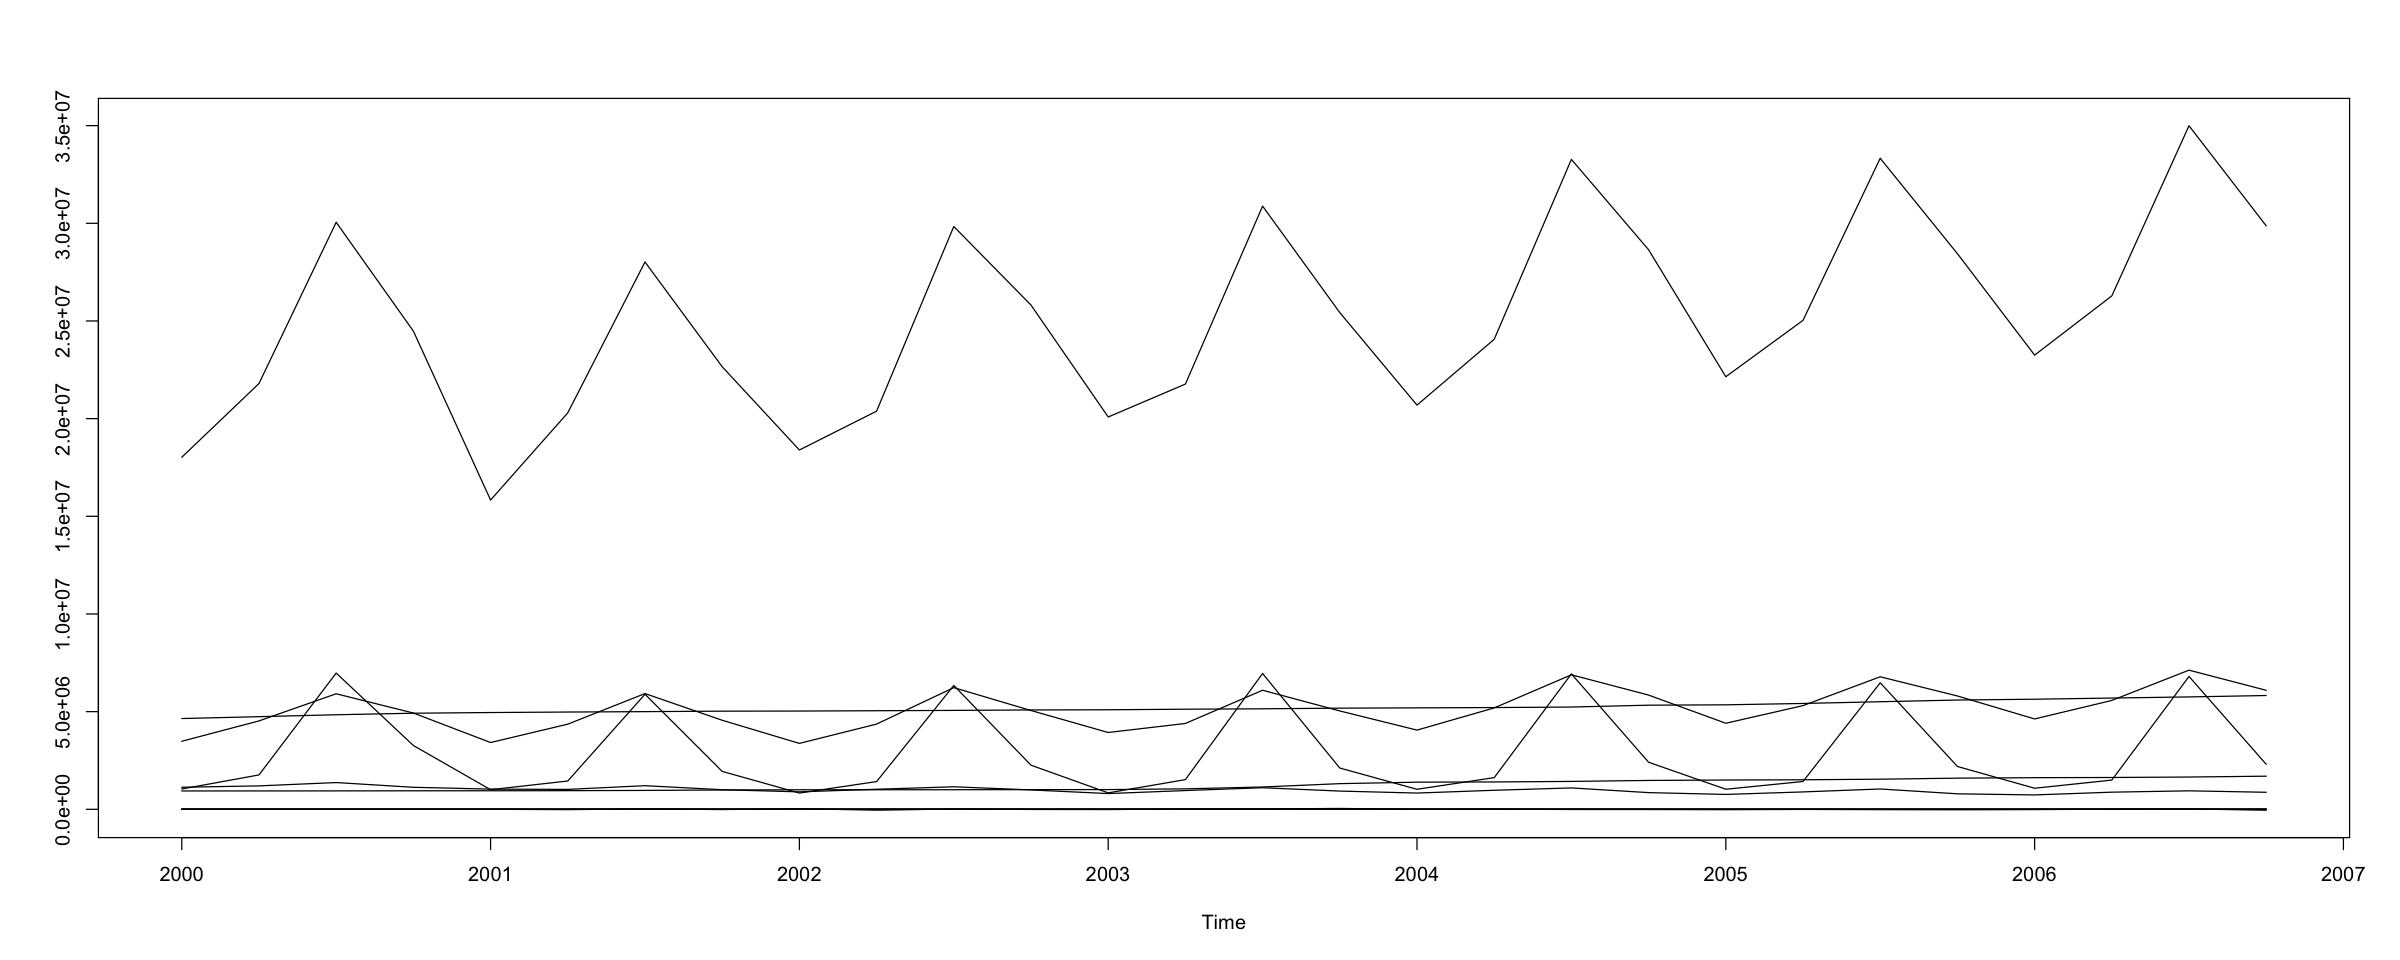

In [18]:
gasoline$lag4 = c(0,0,0,0,model8$residuals)

ts = ts(gasoline[ ,c(2:14)], freq= 4, start = c(2000,1), end = c(2006,4))
head(ts)
ts.plot(ts)


Call:
lm(formula = Unleaded.Gasoline.Sale..UGS. ~ +lag4 + as.factor(seasonality) + 
    X..of.Diesel.Gasoline.Vehicles..NDGV. + X..Unleaded.Gasoline.Vehicles..NUGV. + 
    Price.of.Diesel.Gasoline..PG., data = ts)

Residuals:
   Min     1Q Median     3Q    Max 
-49726 -15033   -387  18049  48524 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                            2.359e+06  1.210e+05  19.491 1.77e-14
lag4                                  -3.440e-01  3.316e-01  -1.038  0.31186
as.factor(seasonality)2                1.287e+05  1.634e+04   7.878 1.48e-07
as.factor(seasonality)3                2.950e+05  1.710e+04  17.251 1.78e-13
as.factor(seasonality)4                1.051e+05  1.689e+04   6.224 4.44e-06
X..of.Diesel.Gasoline.Vehicles..NDGV.  7.294e+03  1.102e+03   6.616 1.92e-06
X..Unleaded.Gasoline.Vehicles..NUGV.  -6.470e-01  7.156e-02  -9.040 1.68e-08
Price.of.Diesel.Gasoline..PG.         -8.054e+02  2.305e+02  -3.494  0


	Breusch-Godfrey test for serial correlation of order up to 11

data:  Residuals
LM test = 15.007, df = 11, p-value = 0.1822


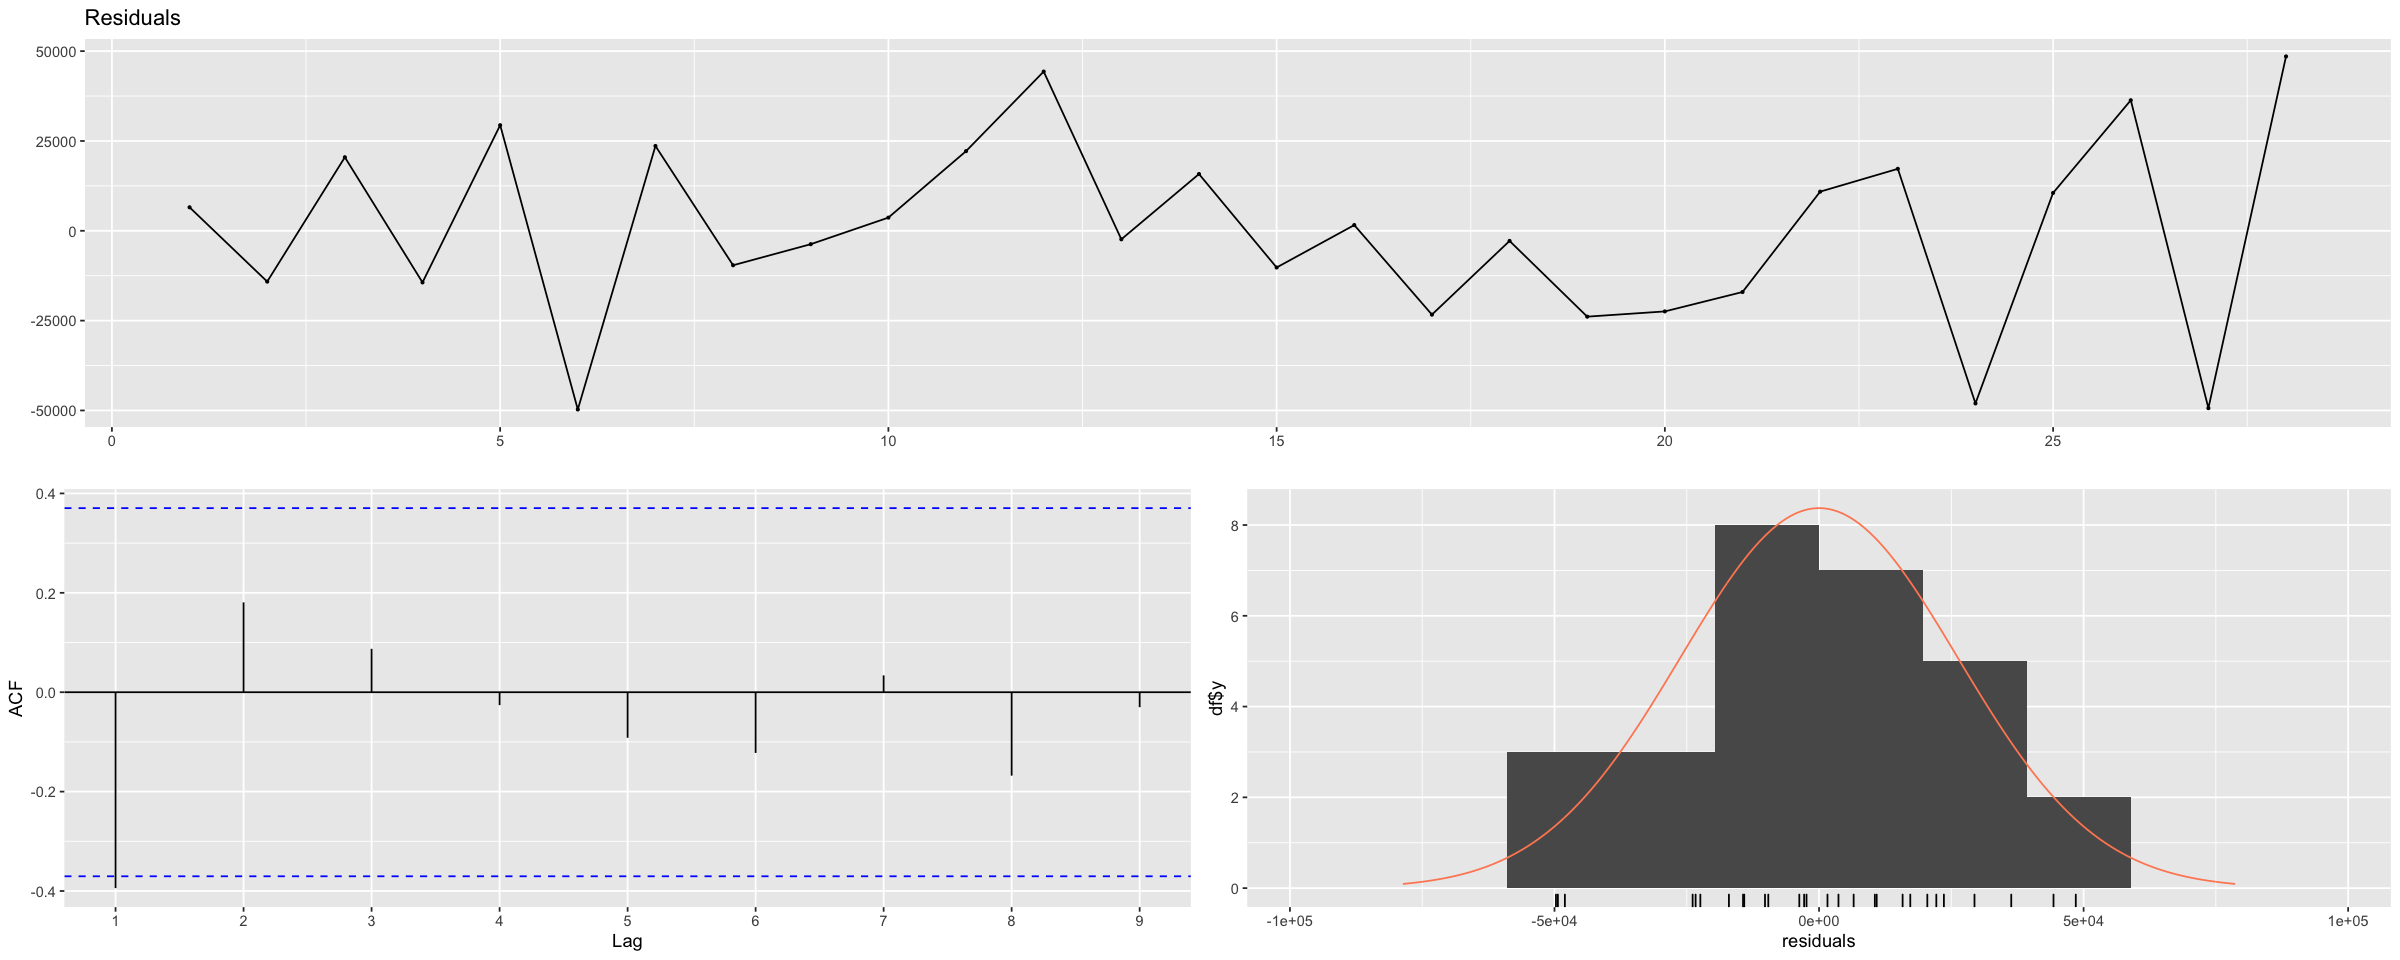

In [19]:
model9 = lm(Unleaded.Gasoline.Sale..UGS.~ +lag4 +as.factor(seasonality) +X..of.Diesel.Gasoline.Vehicles..NDGV.+X..Unleaded.Gasoline.Vehicles..NUGV.+Price.of.Diesel.Gasoline..PG., ts)
summary(model9)
checkresiduals(model9)

In [20]:
predicted = predict(model9,gasoline[29:32,])
predicted

29       30       31       32 
692125.0 809121.7 998937.3 764388.5